In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import re
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
collectedData = {}
df_grad_cd_list = []
for dir1 in os.listdir("CollectedData"):
    if os.path.isdir(os.path.join("CollectedData", dir1)):
        
        collectedData[dir1] = {}
        for dsn_dir in os.listdir(os.path.join("CollectedData", dir1)):
            if os.path.isdir(os.path.join("CollectedData", dir1, dsn_dir)):
                data = json.load(open(os.path.join("CollectedData", dir1, dsn_dir, "dsn_data.json"), "r"))
                collectedData[dir1][dsn_dir] = data

In [3]:
re_log_line = r"\|\s+\d+(\|\s+-?\d+\.\d+){4}\|\n"

dir_list = []
dfs = []
dv_mat = []
surf_dfs = []
surf_cd_dfs = []

#df_meta = pd.DataFrame(columns=["AOA"])
meta_rows = []

result_rows = []
for dir1 in sorted(collectedData.keys()):
    if dir1.startswith("T006"): # or dir1.startswith("T005"):
        for dsn_dir in sorted(collectedData[dir1].keys()):
            dir_str = f"{dir1} {dsn_dir}"
            print(dir_str)
            field_names = ["config_DSN.cfg", "grad_cd", "surface_adjoint_drag", "surface_flow", "log_direct"]
            if len(collectedData[dir1][dsn_dir].keys() & set(field_names)) < len(field_names):
                print("skipping", dir_str)
                continue
            if "config_DSN.cfg" in collectedData[dir1][dsn_dir]:
                config_lines = collectedData[dir1][dsn_dir]["config_DSN.cfg"]
                dv_line = [l for l in config_lines if l.startswith("DV_VALUE=")][-1].strip()
                #print(dv_line)
                dvs = [float(x) for x in dv_line[10:].split(", ")]
                #if len(dvs) < 30:
                #    print(dir1, dsn_dir)
                #    continue
                #print(dvs)
                if len(dvs) == 38:
                    dv_mat.append(dvs)
            if "grad_cd" in collectedData[dir1][dsn_dir]:
                df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["grad_cd"])
                df["DIR"] = dir_str
                dfs.append(df)
                dir_list.append(f"{dir1} {dsn_dir}")
            if "surface_adjoint_drag" in collectedData[dir1][dsn_dir]:
                surf_df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["surface_adjoint_drag"])
                surf_df["DIR"] = dir_str
                surf_cd_dfs.append(surf_df)
            if "surface_flow" in collectedData[dir1][dsn_dir]:
                surf_df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["surface_flow"])
                surf_df["DIR"] = dir_str
                surf_dfs.append(surf_df)
            if "log_direct" in collectedData[dir1][dsn_dir]:
                log_lines = collectedData[dir1][dsn_dir]["log_direct"]
                log_lines_iter = [l for l in log_lines if re.match(re_log_line, l)]#[-100:]
                lls = log_lines_iter[-1].split("|")[1:-1]
                iteration = int(lls[0])
                rms_rho = float(lls[1])
                rms_nu = float(lls[2])
                c_L = float(lls[3])
                c_D = float(lls[4])
                #print(dir_str, c_L, c_D)
                result_rows.append((dir_str, c_L, c_D, rms_rho, rms_nu))
            if "flow.meta" in collectedData[dir1][dsn_dir]:
                #print(collectedData[dir1][dsn_dir]["flow.meta"])
                #break
                for l in collectedData[dir1][dsn_dir]["flow.meta"]:
                    if l.startswith("AOA="):
                        meta_rows.append((dir_str, float(l.strip().split()[1])))

#dv_mat = np.asarray(dv_mat)
df_result = pd.DataFrame(columns=["DIR", "c_L", "c_D", "rms_rho", "rms_nu"], data=result_rows)
df_meta =  pd.DataFrame(columns=["DIR", "AOA"], data=meta_rows)
df_result = df_result.merge(df_meta, on="DIR")

T006 DSN_000
T006 DSN_001
T006 DSN_002
T006 DSN_003
T006 DSN_004
T006 DSN_005
T006 DSN_006
T006 DSN_007
T006 DSN_008
T006 DSN_009
T006 DSN_010
T006 DSN_011
T006 DSN_012
T006 DSN_013
T006 DSN_014
T006 DSN_015
T006 DSN_016
T006 DSN_017
T006 DSN_018
T006 DSN_019
T006 DSN_020
T006 DSN_021
T006 DSN_022
T006 DSN_023
T006 DSN_024
T006 DSN_025
T006 DSN_026
T006 DSN_027
T006 DSN_028
T006 DSN_029
T006 DSN_030
T006 DSN_031
T006 DSN_032
T006 DSN_033
T006 DSN_034
T006 DSN_035
T006 DSN_036
T006 DSN_037
T006 DSN_038
T006 DSN_039
T006 DSN_040
T006 DSN_041
T006 DSN_042
T006 DSN_043
T006 DSN_044
T006 DSN_045
T006 DSN_046
T006 DSN_047
T006 DSN_048
T006 DSN_049
T006 DSN_050
T006 DSN_051
T006 DSN_052
T006 DSN_053
T006 DSN_054
T006 DSN_055
T006 DSN_056
T006 DSN_057
T006 DSN_058
T006 DSN_059
T006 DSN_060
T006 DSN_061
T006 DSN_062
T006 DSN_063
T006 DSN_064
T006 DSN_065
T006 DSN_066
T006 DSN_067
T006 DSN_068
T006 DSN_069
T006 DSN_070
T006 DSN_071
T006 DSN_072
T006 DSN_073
T006 DSN_074
T006 DSN_075
T006 DSN_076

T006 DSN_639
T006 DSN_640
T006 DSN_641
T006 DSN_642
T006 DSN_643
T006 DSN_644
T006 DSN_645
T006 DSN_646
T006 DSN_647
T006 DSN_648
T006 DSN_649
T006 DSN_650
T006 DSN_651
T006 DSN_652
T006 DSN_653
T006 DSN_654
T006 DSN_655
T006 DSN_656
T006 DSN_657
T006 DSN_658
T006 DSN_659
T006 DSN_660
T006 DSN_661
T006 DSN_662
T006 DSN_663
T006 DSN_664
T006 DSN_665
T006 DSN_666
T006 DSN_667
T006 DSN_668
T006 DSN_669
T006 DSN_670
T006 DSN_671
T006 DSN_672
T006 DSN_673
T006 DSN_674
T006 DSN_675
T006 DSN_676
T006 DSN_677
T006 DSN_678
T006 DSN_679
T006 DSN_680
T006 DSN_681
T006 DSN_682
T006 DSN_683
T006 DSN_684
T006 DSN_685
T006 DSN_686
T006 DSN_687
T006 DSN_688
T006 DSN_689
T006 DSN_690
T006 DSN_691
T006 DSN_692
T006 DSN_693
T006 DSN_694
T006 DSN_695
T006 DSN_696
T006 DSN_697
T006 DSN_698
T006 DSN_699
T006 DSN_700
T006 DSN_701
T006 DSN_702
T006 DSN_703
T006 DSN_704
T006 DSN_705
T006 DSN_706
T006 DSN_707
T006 DSN_708
T006 DSN_709
T006 DSN_710
T006 DSN_711
T006 DSN_712
T006 DSN_713
T006 DSN_714
T006 DSN_715

In [4]:
import pickle
dir1 = "T006"
dv_list = pickle.load(open(os.path.join("CollectedData", dir1, "dv_list.p"), "rb"))
dv_mat2 = np.asarray(dv_list) #[:len(dir_list),:]
if len(dv_mat):
    dv_mat = np.vstack((np.asarray(dv_mat), dv_mat2))[:len(dir_list),:]
else:
    dv_mat = dv_mat2[:len(dir_list),:]

In [5]:
df_surface = pd.concat(surf_dfs)
df_surface_adjoint_drag_total = pd.concat(surf_cd_dfs)
df_surface = df_surface.merge(df_surface_adjoint_drag_total, on=["PointID", "DIR"], suffixes=["", "_right"])

In [6]:
input_columns = ["x", "y"]
dir_names = dir_list

N = len(dir_names)
M = len(input_columns)

X = np.zeros((N, M, 192))
Y = np.zeros((N, 4, 192))

for i, dir in enumerate(dir_names):
    print(dir)
    df_surface_flow = df_surface[df_surface["DIR"] == dir]
    X[i,0,:] = df_surface_flow["x"]
    X[i,1,:] = df_surface_flow["y"]
    Y[i,0,:] = df_surface_flow["Pressure_Coefficient"]
    Y[i,1,1:-1] = 0.1*(Y[i,0,2:] - Y[i,0,:-2] ) / np.sqrt( (X[i,0,2:] - X[i,0,:-2])**2 + (X[i,1,2:] - X[i,1,:-2])**2 )
    
    #Y[i,1,:] = df_surface_flow["Surface_Sensitivity"]
    Y[i,2:] = df_surface_flow["Skin_Friction_Coefficient_x"]
    Y[i,3,:] = df_surface_flow["Skin_Friction_Coefficient_y"]

T006 DSN_000
T006 DSN_001
T006 DSN_002
T006 DSN_003
T006 DSN_004
T006 DSN_005
T006 DSN_006
T006 DSN_007
T006 DSN_008
T006 DSN_009
T006 DSN_010
T006 DSN_011
T006 DSN_012
T006 DSN_013
T006 DSN_014
T006 DSN_015
T006 DSN_016
T006 DSN_017
T006 DSN_018
T006 DSN_019
T006 DSN_020
T006 DSN_021
T006 DSN_022
T006 DSN_023
T006 DSN_024
T006 DSN_025
T006 DSN_026
T006 DSN_027
T006 DSN_028
T006 DSN_029
T006 DSN_030
T006 DSN_031
T006 DSN_032
T006 DSN_033
T006 DSN_034
T006 DSN_035
T006 DSN_036
T006 DSN_037
T006 DSN_038
T006 DSN_039
T006 DSN_040
T006 DSN_041
T006 DSN_042
T006 DSN_043
T006 DSN_044
T006 DSN_045
T006 DSN_046
T006 DSN_047
T006 DSN_048
T006 DSN_049
T006 DSN_050
T006 DSN_051
T006 DSN_052
T006 DSN_053
T006 DSN_054
T006 DSN_055
T006 DSN_056
T006 DSN_057
T006 DSN_058
T006 DSN_059
T006 DSN_060
T006 DSN_061
T006 DSN_062
T006 DSN_063
T006 DSN_064
T006 DSN_065
T006 DSN_066
T006 DSN_067
T006 DSN_068
T006 DSN_069
T006 DSN_070
T006 DSN_071
T006 DSN_072
T006 DSN_073
T006 DSN_074
T006 DSN_075
T006 DSN_076

T006 DSN_641
T006 DSN_642
T006 DSN_643
T006 DSN_644
T006 DSN_645
T006 DSN_646
T006 DSN_647
T006 DSN_648
T006 DSN_649
T006 DSN_650
T006 DSN_651
T006 DSN_652
T006 DSN_653
T006 DSN_654
T006 DSN_655
T006 DSN_656
T006 DSN_657
T006 DSN_658
T006 DSN_659
T006 DSN_660
T006 DSN_661
T006 DSN_662
T006 DSN_663
T006 DSN_664
T006 DSN_665
T006 DSN_666
T006 DSN_667
T006 DSN_668
T006 DSN_669
T006 DSN_670
T006 DSN_671
T006 DSN_672
T006 DSN_673
T006 DSN_674
T006 DSN_675
T006 DSN_676
T006 DSN_677
T006 DSN_678
T006 DSN_679
T006 DSN_680
T006 DSN_681
T006 DSN_682
T006 DSN_683
T006 DSN_684
T006 DSN_685
T006 DSN_686
T006 DSN_687
T006 DSN_688
T006 DSN_689
T006 DSN_690
T006 DSN_691
T006 DSN_692
T006 DSN_693
T006 DSN_694
T006 DSN_695
T006 DSN_696
T006 DSN_697
T006 DSN_698
T006 DSN_699
T006 DSN_700
T006 DSN_701
T006 DSN_702
T006 DSN_703
T006 DSN_704
T006 DSN_705
T006 DSN_706
T006 DSN_707
T006 DSN_708
T006 DSN_709
T006 DSN_710
T006 DSN_711
T006 DSN_712
T006 DSN_713
T006 DSN_714
T006 DSN_715
T006 DSN_716
T006 DSN_717

In [7]:
Y[:,1,:].mean(), np.median(Y[i,1,:])

(-0.6018021957403092, -0.04670133648718935)

In [8]:
Y[:,1,:] = np.clip(Y[:,1,:], -3, 3) * 0.1

In [9]:
a = df_result["rms_rho"] < -6
a.sum()

924

In [10]:
X = X[a]
Y = Y[a]
dv_mat = dv_mat[a]

In [1]:
fig, axes = plt.subplots(10, 3, figsize=(16,40))

#plt.gca().invert_yaxis()

for k, ax in enumerate(axes.flat):
    i = int(k / 3) + 600
    j = k % 3
    #ax.plot(X[i,:,0], Y[i,:,0], ".")
    #ax.plot(X[i,:,0], Y[i,:,j], ".")
    if j == 0:
        ax.plot(X[i,0,:], X[i,1,:], "-")
        ax.set_ylim((-0.2, 0.2))
        ax.grid(True, "both")
        #ax.set_subtitle("GEO")
    elif j == 1:
        ax.scatter(X[i,0,:], Y[i,0,:],c=np.linspace(0, 1, 192))
        ax.invert_yaxis()
        
    elif j == 2:
        ax.scatter(X[i,0,:], Y[i,1,:],c=np.linspace(0, 1, 192))
    ax.set_title(dir_names[i][-7:])
    #print(-np.sum(0.5*(Y[i,1:,0]*dx + Y[i,:-1,0]*dx)))

NameError: name 'plt' is not defined

In [12]:
import torch
import torch.nn as nn

In [13]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
#count_parameters(TestModel())

In [14]:
class TestModel(nn.Module):
    def __init__(self):
        super(TestModel, self).__init__()
        
        self.hidden_size = 16
        self.bidirectional = True
                
        self.encoder = nn.Sequential(
            #nn.TransformerEncoderLayer(d_model=M, nhead=16),
            #nn.Conv1d(in_channels=M,out_channels=16,kernel_size=15,stride=1),
            #nn.SELU(),
            #nn.AlphaDropout(0.1),
            nn.Conv1d(in_channels=2,out_channels=8,kernel_size=15,stride=3),
            nn.SELU(),
            nn.AlphaDropout(0.1),
            nn.Conv1d(in_channels=8,out_channels=16,kernel_size=15,stride=3),
            nn.SELU(),
            nn.AlphaDropout(0.1),
            #nn.Linear(29,16),
            #nn.SELU(),
            #nn.Linear(16,16),
            #nn.SELU(),
            #nn.Linear(16,8)
        )
        #self.conv1 = nn.Conv1d(in_channels=64,out_channels=32,kernel_size=15,stride=2)
        #self.selu1 = nn.SELU()
        #self.alpha_do1 = nn.AlphaDropout(0.1)
        #self.skip2 = nn.Linear(2,)
        
        
        self.gru = nn.GRU(input_size=16, hidden_size=self.hidden_size, bidirectional=self.bidirectional, dropout=0.1, num_layers=3)
        #self.skip1 = nn.Linear(M, self.hidden_size)
        #self.pool1 = nn.MaxPool1d()
        self.lin1 = nn.Linear(16*32, 38)
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(in_channels=1,out_channels=4,kernel_size=5,stride=2),
            nn.SELU(),
            nn.ConvTranspose1d(in_channels=4,out_channels=8,kernel_size=5,stride=2),
            nn.SELU(),
            #nn.ConvTranspose1d(in_channels=4,out_channels=2,kernel_size=5,stride=2),
            #nn.ELU(),
           # nn.Linear(193, 192),
            #nn.Conv1d(in_channels=4,out_channels=1,kernel_size=2,stride=1),
            #nn.ELU(),
           # nn.SELU(),
           # nn.AlphaDropout(0.1),
        )
        
        self.out = nn.Linear(64, 1)
    
    def forward(self, x, h):
        
        x_T = torch.transpose(x, 1, 2)
        
        z = self.encoder(x_T)
        z, h = self.gru(z, h)
        z = self.lin1(z.view(-1, 1, 16*32))
        
        return z, h
        #return self.out(z)
        
    def init_hidden(self):
        if self.bidirectional:
            return(torch.zeros(2*3, 16, self.hidden_size))
        else:
            return(torch.zeros(3, 212, self.hidden_size))
    
    

In [15]:
class TestModel(nn.Module):
    def __init__(self):
        super(TestModel, self).__init__()
        
        self.hidden_size = 16
        self.bidirectional = True
        
        c1, c2, c3 = 32, 64, 32
        c4, c5, c6 = 32, 64, 64
                
        self.encoder = nn.Sequential(
            nn.Conv1d(in_channels=2,out_channels=c1,kernel_size=15,stride=1, padding=7),
            nn.PReLU(),
            nn.MaxPool1d(kernel_size=3),
            nn.Conv1d(in_channels=c1,out_channels=c2,kernel_size=15,stride=1, padding=7),
            nn.PReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=c2,out_channels=c3,kernel_size=15,stride=1, padding=7),
            nn.PReLU(),
            nn.Linear(32,64),
            #nn.PReLU(),
            #nn.Linear(64,32),
            #nn.PReLU(),
            nn.Conv1d(in_channels=c3,out_channels=1,kernel_size=1,stride=1),
        )
    
        self.decoder = nn.Sequential(
            #nn.MaxUnpool1d(kernel_size=3),
            nn.Linear(64,64),
            nn.ConvTranspose1d(in_channels=1, out_channels=c4, kernel_size=7,stride=2),
            nn.PReLU(),
            nn.ConvTranspose1d(in_channels=c4, out_channels=c5, kernel_size=7,stride=2),
            nn.PReLU(),
            #nn.MaxPool1d(kernel_size=2),
            nn.ConvTranspose1d(in_channels=c5, out_channels=c6, kernel_size=7,stride=2),
            nn.PReLU(),
            #nn.MaxPool1d(kernel_size=2),
            nn.ConvTranspose1d(in_channels=c6, out_channels=4, kernel_size=7,stride=2),
        )
    
    def forward(self, x):
        
        x_stacked = torch.cat((x, x, x), dim=2)
        
        z = self.encoder(x)
        r = torch.randn_like(z)
        
        y = self.decoder(z + r)
        
        d = y.shape[2] - x.shape[2]
        d0 = int(d/2)
        #print(d)
        
        out_mask = torch.ones(y.shape[2], dtype=torch.long)
        out_mask[:d0] = 0
        out_mask[-d0+d:] = 0
        
        #print(d,d0)
        
        return y[:,:,d0:d0-d]
        #return torch.index_select(y, dim=2, index=out_mask)
    
    def wo_rand(self, x):
        
        x_stacked = torch.cat((x, x, x), dim=2)
        
        z = self.encoder(x)
        #r = torch.randn_like(z)
        
        y = self.decoder(z)
        
        d = y.shape[2] - x.shape[2]
        d0 = int(d/2)
        
        out_mask = torch.ones(y.shape[2], dtype=torch.long)
        out_mask[:d0] = 0
        out_mask[-d0+d:] = 0
        
        #print(d,d0)
        
        return y[:,:,d0:d0-d]
    
        
tm = TestModel()

x = torch.rand(1,2,192)

y = tm(x)
y.shape, count_parameters(tm)

+------------------+------------+
|     Modules      | Parameters |
+------------------+------------+
| encoder.0.weight |    960     |
|  encoder.0.bias  |     32     |
| encoder.1.weight |     1      |
| encoder.3.weight |   30720    |
|  encoder.3.bias  |     64     |
| encoder.4.weight |     1      |
| encoder.6.weight |   30720    |
|  encoder.6.bias  |     32     |
| encoder.7.weight |     1      |
| encoder.8.weight |    2048    |
|  encoder.8.bias  |     64     |
| encoder.9.weight |     32     |
|  encoder.9.bias  |     1      |
| decoder.0.weight |    4096    |
|  decoder.0.bias  |     64     |
| decoder.1.weight |    224     |
|  decoder.1.bias  |     32     |
| decoder.2.weight |     1      |
| decoder.3.weight |   14336    |
|  decoder.3.bias  |     64     |
| decoder.4.weight |     1      |
| decoder.5.weight |   28672    |
|  decoder.5.bias  |     64     |
| decoder.6.weight |     1      |
| decoder.7.weight |    1792    |
|  decoder.7.bias  |     4      |
+-------------

(torch.Size([1, 4, 192]), 114027)

In [16]:
tm = TestModel()
x = torch.rand(1,2,192)
x_stacked = torch.cat((x, x, x), dim=2)
z = tm.encoder(x)
z.shape

torch.Size([1, 1, 64])

In [17]:
count_parameters(tm)

+------------------+------------+
|     Modules      | Parameters |
+------------------+------------+
| encoder.0.weight |    960     |
|  encoder.0.bias  |     32     |
| encoder.1.weight |     1      |
| encoder.3.weight |   30720    |
|  encoder.3.bias  |     64     |
| encoder.4.weight |     1      |
| encoder.6.weight |   30720    |
|  encoder.6.bias  |     32     |
| encoder.7.weight |     1      |
| encoder.8.weight |    2048    |
|  encoder.8.bias  |     64     |
| encoder.9.weight |     32     |
|  encoder.9.bias  |     1      |
| decoder.0.weight |    4096    |
|  decoder.0.bias  |     64     |
| decoder.1.weight |    224     |
|  decoder.1.bias  |     32     |
| decoder.2.weight |     1      |
| decoder.3.weight |   14336    |
|  decoder.3.bias  |     64     |
| decoder.4.weight |     1      |
| decoder.5.weight |   28672    |
|  decoder.5.bias  |     64     |
| decoder.6.weight |     1      |
| decoder.7.weight |    1792    |
|  decoder.7.bias  |     4      |
+-------------

114027

In [18]:
X = torch.from_numpy(X).float()
Y = torch.from_numpy(Y).float()
#Y[:,1,:] *= 0.1

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y[:,:,:], test_size=0.2)

In [21]:
c_D = torch.from_numpy(df_result["c_D"].values)[a]
x_train, x_test, y_train, y_test, c_D_train, c_D_test = train_test_split(X, Y[:,:,:], c_D, test_size=0.2)

In [129]:
pickle.dump(x_train, open("save/x_train.p", "wb"))
pickle.dump(x_test, open("save/x_test.p", "wb"))
pickle.dump(y_train, open("save/y_train.p", "wb"))
pickle.dump(y_test, open("save/y_test.p", "wb"))
pickle.dump(c_D_train, open("save/c_D_train.p", "wb"))
pickle.dump(c_D_test, open("save/c_D_test.p", "wb"))

In [22]:
x_train.shape

torch.Size([739, 2, 192])

In [23]:
y_test.shape

torch.Size([185, 4, 192])

In [24]:
tm(X[:3]).shape

torch.Size([3, 4, 192])

In [25]:
dataset = torch.utils.data.TensorDataset(x_train, y_train)
loader = torch.utils.data.DataLoader(dataset, batch_size=x_train.shape[0], shuffle=True, pin_memory=True)

In [26]:
net = TestModel()

In [27]:
net = net.to("cuda")

In [107]:
import torch.optim as optim


criterion = nn.MSELoss()
#optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.09)
optimizer = optim.Adagrad(net.parameters(),)
#optimizer = optim.Adam(net.parameters(),)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.975)
epoch = 0

In [108]:
net.train()

for _epoch in range(200_000):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, target = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.to("cuda"))
        
        #h0 = net.init_hidden()
        #outputs, h = net(inputs, h0)
        
        loss = criterion(outputs, target.to("cuda"))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if epoch % 10 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.9f' %
                  (epoch + 1, i + 1, running_loss/10))
            running_loss = 0.0
            print(scheduler.get_last_lr())
    scheduler.step()
    
    #print('[%d, %5d] loss: %f' % (epoch + 1, i + 1, running_loss / i))
    epoch += 1
print('Finished Training')

[1,     1] loss: 0.000275006
[0.01]
[11,     1] loss: 0.007841391
[0.01]
[21,     1] loss: 0.003840643
[0.01]
[31,     1] loss: 0.002184524
[0.01]
[41,     1] loss: 0.001737720
[0.01]
[51,     1] loss: 0.001550740
[0.01]
[61,     1] loss: 0.001449810
[0.01]
[71,     1] loss: 0.001380887
[0.01]
[81,     1] loss: 0.001343242
[0.01]
[91,     1] loss: 0.001337278
[0.01]
[101,     1] loss: 0.001303225
[0.01]
[111,     1] loss: 0.001254617
[0.01]
[121,     1] loss: 0.001218160
[0.01]
[131,     1] loss: 0.001194748
[0.01]
[141,     1] loss: 0.001169887
[0.01]
[151,     1] loss: 0.001155012
[0.01]
[161,     1] loss: 0.001137193
[0.01]
[171,     1] loss: 0.001124170
[0.01]
[181,     1] loss: 0.001111878
[0.01]
[191,     1] loss: 0.001104924
[0.01]
[201,     1] loss: 0.001097609
[0.01]
[211,     1] loss: 0.001088563
[0.01]
[221,     1] loss: 0.001079025
[0.01]
[231,     1] loss: 0.001064016
[0.01]
[241,     1] loss: 0.001048452
[0.01]
[251,     1] loss: 0.001036073
[0.01]
[261,     1] loss: 0.00

[1781,     1] loss: 0.000430920
[0.009268593749999998]
[1791,     1] loss: 0.000429741
[0.009268593749999998]
[1801,     1] loss: 0.000432356
[0.009268593749999998]
[1811,     1] loss: 0.000434986
[0.009268593749999998]
[1821,     1] loss: 0.000436638
[0.009268593749999998]
[1831,     1] loss: 0.000441714
[0.009268593749999998]
[1841,     1] loss: 0.000439576
[0.009268593749999998]
[1851,     1] loss: 0.000439030
[0.009268593749999998]
[1861,     1] loss: 0.000431656
[0.009268593749999998]
[1871,     1] loss: 0.000430457
[0.009268593749999998]
[1881,     1] loss: 0.000425187
[0.009268593749999998]
[1891,     1] loss: 0.000420717
[0.009268593749999998]
[1901,     1] loss: 0.000424412
[0.009268593749999998]
[1911,     1] loss: 0.000418381
[0.009268593749999998]
[1921,     1] loss: 0.000415281
[0.009268593749999998]
[1931,     1] loss: 0.000416998
[0.009268593749999998]
[1941,     1] loss: 0.000414777
[0.009268593749999998]
[1951,     1] loss: 0.000412023
[0.009268593749999998]
[1961,    

[3281,     1] loss: 0.000353188
[0.008590683010253905]
[3291,     1] loss: 0.000356207
[0.008590683010253905]
[3301,     1] loss: 0.000363538
[0.008590683010253905]
[3311,     1] loss: 0.000364028
[0.008590683010253905]
[3321,     1] loss: 0.000367172
[0.008590683010253905]
[3331,     1] loss: 0.000363527
[0.008590683010253905]
[3341,     1] loss: 0.000355458
[0.008590683010253905]
[3351,     1] loss: 0.000351366
[0.008590683010253905]
[3361,     1] loss: 0.000349378
[0.008590683010253905]
[3371,     1] loss: 0.000344980
[0.008590683010253905]
[3381,     1] loss: 0.000346145
[0.008590683010253905]
[3391,     1] loss: 0.000342209
[0.008590683010253905]
[3401,     1] loss: 0.000342543
[0.008590683010253905]
[3411,     1] loss: 0.000342211
[0.008590683010253905]
[3421,     1] loss: 0.000343968
[0.008590683010253905]
[3431,     1] loss: 0.000345211
[0.008590683010253905]
[3441,     1] loss: 0.000341173
[0.008590683010253905]
[3451,     1] loss: 0.000346071
[0.008590683010253905]
[3461,    

[4781,     1] loss: 0.000318683
[0.007962355085707053]
[4791,     1] loss: 0.000318646
[0.007962355085707053]
[4801,     1] loss: 0.000314910
[0.007962355085707053]
[4811,     1] loss: 0.000320299
[0.007962355085707053]
[4821,     1] loss: 0.000319134
[0.007962355085707053]
[4831,     1] loss: 0.000317641
[0.007962355085707053]
[4841,     1] loss: 0.000321024
[0.007962355085707053]
[4851,     1] loss: 0.000321382
[0.007962355085707053]
[4861,     1] loss: 0.000321106
[0.007962355085707053]
[4871,     1] loss: 0.000326085
[0.007962355085707053]
[4881,     1] loss: 0.000321663
[0.007962355085707053]
[4891,     1] loss: 0.000323464
[0.007962355085707053]
[4901,     1] loss: 0.000327404
[0.007962355085707053]
[4911,     1] loss: 0.000324265
[0.007962355085707053]
[4921,     1] loss: 0.000321492
[0.007962355085707053]
[4931,     1] loss: 0.000319782
[0.007962355085707053]
[4941,     1] loss: 0.000320610
[0.007962355085707053]
[4951,     1] loss: 0.000318771
[0.007962355085707053]
[4961,    

[6281,     1] loss: 0.000297379
[0.00737998345826651]
[6291,     1] loss: 0.000298792
[0.00737998345826651]
[6301,     1] loss: 0.000297832
[0.00737998345826651]
[6311,     1] loss: 0.000297746
[0.00737998345826651]
[6321,     1] loss: 0.000297883
[0.00737998345826651]
[6331,     1] loss: 0.000298333
[0.00737998345826651]
[6341,     1] loss: 0.000298603
[0.00737998345826651]
[6351,     1] loss: 0.000297315
[0.00737998345826651]
[6361,     1] loss: 0.000294979
[0.00737998345826651]
[6371,     1] loss: 0.000297832
[0.00737998345826651]
[6381,     1] loss: 0.000295668
[0.00737998345826651]
[6391,     1] loss: 0.000295716
[0.00737998345826651]
[6401,     1] loss: 0.000295800
[0.00737998345826651]
[6411,     1] loss: 0.000298240
[0.00737998345826651]
[6421,     1] loss: 0.000297187
[0.00737998345826651]
[6431,     1] loss: 0.000297306
[0.00737998345826651]
[6441,     1] loss: 0.000296493
[0.00737998345826651]
[6451,     1] loss: 0.000297479
[0.00737998345826651]
[6461,     1] loss: 0.000295

[7781,     1] loss: 0.000285307
[0.006840206855639235]
[7791,     1] loss: 0.000286494
[0.006840206855639235]
[7801,     1] loss: 0.000285262
[0.006840206855639235]
[7811,     1] loss: 0.000285101
[0.006840206855639235]
[7821,     1] loss: 0.000285950
[0.006840206855639235]
[7831,     1] loss: 0.000287502
[0.006840206855639235]
[7841,     1] loss: 0.000285927
[0.006840206855639235]
[7851,     1] loss: 0.000283910
[0.006840206855639235]
[7861,     1] loss: 0.000287805
[0.006840206855639235]
[7871,     1] loss: 0.000284410
[0.006840206855639235]
[7881,     1] loss: 0.000286128
[0.006840206855639235]
[7891,     1] loss: 0.000284602
[0.006840206855639235]
[7901,     1] loss: 0.000286247
[0.006840206855639235]
[7911,     1] loss: 0.000285739
[0.006840206855639235]
[7921,     1] loss: 0.000283987
[0.006840206855639235]
[7931,     1] loss: 0.000282802
[0.006840206855639235]
[7941,     1] loss: 0.000284723
[0.006840206855639235]
[7951,     1] loss: 0.000283912
[0.006840206855639235]
[7961,    

[9271,     1] loss: 0.000276477
[0.006339909851088496]
[9281,     1] loss: 0.000275759
[0.006339909851088496]
[9291,     1] loss: 0.000274400
[0.006339909851088496]
[9301,     1] loss: 0.000273712
[0.006339909851088496]
[9311,     1] loss: 0.000273366
[0.006339909851088496]
[9321,     1] loss: 0.000274239
[0.006339909851088496]
[9331,     1] loss: 0.000275605
[0.006339909851088496]
[9341,     1] loss: 0.000273789
[0.006339909851088496]
[9351,     1] loss: 0.000273960
[0.006339909851088496]
[9361,     1] loss: 0.000274074
[0.006339909851088496]
[9371,     1] loss: 0.000273316
[0.006339909851088496]
[9381,     1] loss: 0.000274142
[0.006339909851088496]
[9391,     1] loss: 0.000272978
[0.006339909851088496]
[9401,     1] loss: 0.000274916
[0.006339909851088496]
[9411,     1] loss: 0.000273833
[0.006339909851088496]
[9421,     1] loss: 0.000274367
[0.006339909851088496]
[9431,     1] loss: 0.000274614
[0.006339909851088496]
[9441,     1] loss: 0.000275392
[0.006339909851088496]
[9451,    

[10751,     1] loss: 0.000266889
[0.005876204882136226]
[10761,     1] loss: 0.000264422
[0.005876204882136226]
[10771,     1] loss: 0.000265226
[0.005876204882136226]
[10781,     1] loss: 0.000266760
[0.005876204882136226]
[10791,     1] loss: 0.000267122
[0.005876204882136226]
[10801,     1] loss: 0.000265801
[0.005876204882136226]
[10811,     1] loss: 0.000265267
[0.005876204882136226]
[10821,     1] loss: 0.000266979
[0.005876204882136226]
[10831,     1] loss: 0.000264430
[0.005876204882136226]
[10841,     1] loss: 0.000267451
[0.005876204882136226]
[10851,     1] loss: 0.000265260
[0.005876204882136226]
[10861,     1] loss: 0.000266522
[0.005876204882136226]
[10871,     1] loss: 0.000266641
[0.005876204882136226]
[10881,     1] loss: 0.000266889
[0.005876204882136226]
[10891,     1] loss: 0.000264601
[0.005876204882136226]
[10901,     1] loss: 0.000265455
[0.005876204882136226]
[10911,     1] loss: 0.000265276
[0.005876204882136226]
[10921,     1] loss: 0.000265519
[0.005876204882

[12221,     1] loss: 0.000260088
[0.0054464155844287316]
[12231,     1] loss: 0.000260480
[0.0054464155844287316]
[12241,     1] loss: 0.000260134
[0.0054464155844287316]
[12251,     1] loss: 0.000257349
[0.0054464155844287316]
[12261,     1] loss: 0.000258974
[0.0054464155844287316]
[12271,     1] loss: 0.000259867
[0.0054464155844287316]
[12281,     1] loss: 0.000259393
[0.0054464155844287316]
[12291,     1] loss: 0.000260096
[0.0054464155844287316]
[12301,     1] loss: 0.000259933
[0.0054464155844287316]
[12311,     1] loss: 0.000260469
[0.0054464155844287316]
[12321,     1] loss: 0.000260645
[0.0054464155844287316]
[12331,     1] loss: 0.000260963
[0.0054464155844287316]
[12341,     1] loss: 0.000257887
[0.0054464155844287316]
[12351,     1] loss: 0.000262468
[0.0054464155844287316]
[12361,     1] loss: 0.000259357
[0.0054464155844287316]
[12371,     1] loss: 0.000260350
[0.0054464155844287316]
[12381,     1] loss: 0.000258050
[0.0054464155844287316]
[12391,     1] loss: 0.00025961

[13671,     1] loss: 0.000254522
[0.005048061344573873]
[13681,     1] loss: 0.000254687
[0.005048061344573873]
[13691,     1] loss: 0.000255174
[0.005048061344573873]
[13701,     1] loss: 0.000254961
[0.005048061344573873]
[13711,     1] loss: 0.000255560
[0.005048061344573873]
[13721,     1] loss: 0.000254290
[0.005048061344573873]
[13731,     1] loss: 0.000254155
[0.005048061344573873]
[13741,     1] loss: 0.000254784
[0.005048061344573873]
[13751,     1] loss: 0.000256002
[0.005048061344573873]
[13761,     1] loss: 0.000254676
[0.005048061344573873]
[13771,     1] loss: 0.000254325
[0.005048061344573873]
[13781,     1] loss: 0.000255213
[0.005048061344573873]
[13791,     1] loss: 0.000252429
[0.005048061344573873]
[13801,     1] loss: 0.000255625
[0.005048061344573873]
[13811,     1] loss: 0.000254214
[0.005048061344573873]
[13821,     1] loss: 0.000254326
[0.005048061344573873]
[13831,     1] loss: 0.000251819
[0.005048061344573873]
[13841,     1] loss: 0.000255468
[0.005048061344

[15141,     1] loss: 0.000250524
[0.0046788429827933995]
[15151,     1] loss: 0.000248531
[0.0046788429827933995]
[15161,     1] loss: 0.000250667
[0.0046788429827933995]
[15171,     1] loss: 0.000248158
[0.0046788429827933995]
[15181,     1] loss: 0.000249364
[0.0046788429827933995]
[15191,     1] loss: 0.000250055
[0.0046788429827933995]
[15201,     1] loss: 0.000246067
[0.0046788429827933995]
[15211,     1] loss: 0.000249103
[0.0046788429827933995]
[15221,     1] loss: 0.000249207
[0.0046788429827933995]
[15231,     1] loss: 0.000249044
[0.0046788429827933995]
[15241,     1] loss: 0.000248971
[0.0046788429827933995]
[15251,     1] loss: 0.000251168
[0.0046788429827933995]
[15261,     1] loss: 0.000248779
[0.0046788429827933995]
[15271,     1] loss: 0.000249563
[0.0046788429827933995]
[15281,     1] loss: 0.000248755
[0.0046788429827933995]
[15291,     1] loss: 0.000250540
[0.0046788429827933995]
[15301,     1] loss: 0.000248480
[0.0046788429827933995]
[15311,     1] loss: 0.00024981

[16601,     1] loss: 0.000244563
[0.004336629482755025]
[16611,     1] loss: 0.000247021
[0.004336629482755025]
[16621,     1] loss: 0.000245475
[0.004336629482755025]
[16631,     1] loss: 0.000245885
[0.004336629482755025]
[16641,     1] loss: 0.000245008
[0.004336629482755025]
[16651,     1] loss: 0.000246192
[0.004336629482755025]
[16661,     1] loss: 0.000245977
[0.004336629482755025]
[16671,     1] loss: 0.000246588
[0.004336629482755025]
[16681,     1] loss: 0.000243527
[0.004336629482755025]
[16691,     1] loss: 0.000244255
[0.004336629482755025]
[16701,     1] loss: 0.000246065
[0.004336629482755025]
[16711,     1] loss: 0.000245262
[0.004336629482755025]
[16721,     1] loss: 0.000245683
[0.004336629482755025]
[16731,     1] loss: 0.000244276
[0.004336629482755025]
[16741,     1] loss: 0.000246485
[0.004336629482755025]
[16751,     1] loss: 0.000243065
[0.004336629482755025]
[16761,     1] loss: 0.000247926
[0.004336629482755025]
[16771,     1] loss: 0.000243850
[0.004336629482

[18071,     1] loss: 0.000243112
[0.004019445691992895]
[18081,     1] loss: 0.000242614
[0.004019445691992895]
[18091,     1] loss: 0.000240692
[0.004019445691992895]
[18101,     1] loss: 0.000241378
[0.004019445691992895]
[18111,     1] loss: 0.000242630
[0.004019445691992895]
[18121,     1] loss: 0.000240382
[0.004019445691992895]
[18131,     1] loss: 0.000239252
[0.004019445691992895]
[18141,     1] loss: 0.000242596
[0.004019445691992895]
[18151,     1] loss: 0.000242550
[0.004019445691992895]
[18161,     1] loss: 0.000241925
[0.004019445691992895]
[18171,     1] loss: 0.000242139
[0.004019445691992895]
[18181,     1] loss: 0.000239558
[0.004019445691992895]
[18191,     1] loss: 0.000240543
[0.004019445691992895]
[18201,     1] loss: 0.000242025
[0.004019445691992895]
[18211,     1] loss: 0.000240945
[0.004019445691992895]
[18221,     1] loss: 0.000240653
[0.004019445691992895]
[18231,     1] loss: 0.000243300
[0.004019445691992895]
[18241,     1] loss: 0.000241485
[0.004019445691

[19531,     1] loss: 0.000238084
[0.003725460921926977]
[19541,     1] loss: 0.000236494
[0.003725460921926977]
[19551,     1] loss: 0.000238555
[0.003725460921926977]
[19561,     1] loss: 0.000239138
[0.003725460921926977]
[19571,     1] loss: 0.000239752
[0.003725460921926977]
[19581,     1] loss: 0.000236237
[0.003725460921926977]
[19591,     1] loss: 0.000237305
[0.003725460921926977]
[19601,     1] loss: 0.000237753
[0.003725460921926977]
[19611,     1] loss: 0.000237240
[0.003725460921926977]
[19621,     1] loss: 0.000239550
[0.003725460921926977]
[19631,     1] loss: 0.000242189
[0.003725460921926977]
[19641,     1] loss: 0.000239062
[0.003725460921926977]
[19651,     1] loss: 0.000237326
[0.003725460921926977]
[19661,     1] loss: 0.000238434
[0.003725460921926977]
[19671,     1] loss: 0.000241121
[0.003725460921926977]
[19681,     1] loss: 0.000237606
[0.003725460921926977]
[19691,     1] loss: 0.000238578
[0.003725460921926977]
[19701,     1] loss: 0.000236138
[0.003725460921

[20981,     1] loss: 0.000235960
[0.0035415162889068322]
[20991,     1] loss: 0.000235035
[0.0035415162889068322]
[21001,     1] loss: 0.000236103
[0.0034529783816841615]
[21011,     1] loss: 0.000237029
[0.0034529783816841615]
[21021,     1] loss: 0.000234728
[0.0034529783816841615]
[21031,     1] loss: 0.000236015
[0.0034529783816841615]
[21041,     1] loss: 0.000236496
[0.0034529783816841615]
[21051,     1] loss: 0.000236879
[0.0034529783816841615]
[21061,     1] loss: 0.000238117
[0.0034529783816841615]
[21071,     1] loss: 0.000236270
[0.0034529783816841615]
[21081,     1] loss: 0.000234848
[0.0034529783816841615]
[21091,     1] loss: 0.000234553
[0.0034529783816841615]
[21101,     1] loss: 0.000235917
[0.0034529783816841615]
[21111,     1] loss: 0.000235656
[0.0034529783816841615]
[21121,     1] loss: 0.000234588
[0.0034529783816841615]
[21131,     1] loss: 0.000235610
[0.0034529783816841615]
[21141,     1] loss: 0.000233989
[0.0034529783816841615]
[21151,     1] loss: 0.00023537

[22431,     1] loss: 0.000231759
[0.003282487574088506]
[22441,     1] loss: 0.000234615
[0.003282487574088506]
[22451,     1] loss: 0.000232523
[0.003282487574088506]
[22461,     1] loss: 0.000233127
[0.003282487574088506]
[22471,     1] loss: 0.000235406
[0.003282487574088506]
[22481,     1] loss: 0.000232712
[0.003282487574088506]
[22491,     1] loss: 0.000234660
[0.003282487574088506]
[22501,     1] loss: 0.000232608
[0.0032004253847362934]
[22511,     1] loss: 0.000231579
[0.0032004253847362934]
[22521,     1] loss: 0.000232652
[0.0032004253847362934]
[22531,     1] loss: 0.000232553
[0.0032004253847362934]
[22541,     1] loss: 0.000233332
[0.0032004253847362934]
[22551,     1] loss: 0.000231980
[0.0032004253847362934]
[22561,     1] loss: 0.000232706
[0.0032004253847362934]
[22571,     1] loss: 0.000232671
[0.0032004253847362934]
[22581,     1] loss: 0.000231773
[0.0032004253847362934]
[22591,     1] loss: 0.000230010
[0.0032004253847362934]
[22601,     1] loss: 0.000233898
[0.00

[23881,     1] loss: 0.000229291
[0.0030424043813649386]
[23891,     1] loss: 0.000228041
[0.0030424043813649386]
[23901,     1] loss: 0.000231555
[0.0030424043813649386]
[23911,     1] loss: 0.000230611
[0.0030424043813649386]
[23921,     1] loss: 0.000231543
[0.0030424043813649386]
[23931,     1] loss: 0.000229210
[0.0030424043813649386]
[23941,     1] loss: 0.000232860
[0.0030424043813649386]
[23951,     1] loss: 0.000230629
[0.0030424043813649386]
[23961,     1] loss: 0.000229425
[0.0030424043813649386]
[23971,     1] loss: 0.000232817
[0.0030424043813649386]
[23981,     1] loss: 0.000229141
[0.0030424043813649386]
[23991,     1] loss: 0.000232703
[0.0030424043813649386]
[24001,     1] loss: 0.000229461
[0.002966344271830815]
[24011,     1] loss: 0.000228921
[0.002966344271830815]
[24021,     1] loss: 0.000230221
[0.002966344271830815]
[24031,     1] loss: 0.000230856
[0.002966344271830815]
[24041,     1] loss: 0.000231365
[0.002966344271830815]
[24051,     1] loss: 0.000231614
[0.

[25331,     1] loss: 0.000229072
[0.0028198810234091685]
[25341,     1] loss: 0.000227630
[0.0028198810234091685]
[25351,     1] loss: 0.000229868
[0.0028198810234091685]
[25361,     1] loss: 0.000229456
[0.0028198810234091685]
[25371,     1] loss: 0.000229493
[0.0028198810234091685]
[25381,     1] loss: 0.000228209
[0.0028198810234091685]
[25391,     1] loss: 0.000228841
[0.0028198810234091685]
[25401,     1] loss: 0.000228830
[0.0028198810234091685]
[25411,     1] loss: 0.000226113
[0.0028198810234091685]
[25421,     1] loss: 0.000227967
[0.0028198810234091685]
[25431,     1] loss: 0.000227516
[0.0028198810234091685]
[25441,     1] loss: 0.000228322
[0.0028198810234091685]
[25451,     1] loss: 0.000227612
[0.0028198810234091685]
[25461,     1] loss: 0.000229281
[0.0028198810234091685]
[25471,     1] loss: 0.000226824
[0.0028198810234091685]
[25481,     1] loss: 0.000228135
[0.0028198810234091685]
[25491,     1] loss: 0.000227406
[0.0028198810234091685]
[25501,     1] loss: 0.00022862

[26791,     1] loss: 0.000226896
[0.002613633162931382]
[26801,     1] loss: 0.000227236
[0.002613633162931382]
[26811,     1] loss: 0.000228296
[0.002613633162931382]
[26821,     1] loss: 0.000225164
[0.002613633162931382]
[26831,     1] loss: 0.000227305
[0.002613633162931382]
[26841,     1] loss: 0.000224214
[0.002613633162931382]
[26851,     1] loss: 0.000225790
[0.002613633162931382]
[26861,     1] loss: 0.000226059
[0.002613633162931382]
[26871,     1] loss: 0.000225607
[0.002613633162931382]
[26881,     1] loss: 0.000227993
[0.002613633162931382]
[26891,     1] loss: 0.000227978
[0.002613633162931382]
[26901,     1] loss: 0.000227887
[0.002613633162931382]
[26911,     1] loss: 0.000225193
[0.002613633162931382]
[26921,     1] loss: 0.000228759
[0.002613633162931382]
[26931,     1] loss: 0.000228076
[0.002613633162931382]
[26941,     1] loss: 0.000228220
[0.002613633162931382]
[26951,     1] loss: 0.000227285
[0.002613633162931382]
[26961,     1] loss: 0.000226206
[0.002613633162

[28251,     1] loss: 0.000225090
[0.002422470399873854]
[28261,     1] loss: 0.000225248
[0.002422470399873854]
[28271,     1] loss: 0.000226569
[0.002422470399873854]
[28281,     1] loss: 0.000224279
[0.002422470399873854]
[28291,     1] loss: 0.000222359
[0.002422470399873854]
[28301,     1] loss: 0.000222865
[0.002422470399873854]
[28311,     1] loss: 0.000225326
[0.002422470399873854]
[28321,     1] loss: 0.000225650
[0.002422470399873854]
[28331,     1] loss: 0.000224220
[0.002422470399873854]
[28341,     1] loss: 0.000226730
[0.002422470399873854]
[28351,     1] loss: 0.000223375
[0.002422470399873854]
[28361,     1] loss: 0.000225465
[0.002422470399873854]
[28371,     1] loss: 0.000226348
[0.002422470399873854]
[28381,     1] loss: 0.000225517
[0.002422470399873854]
[28391,     1] loss: 0.000226283
[0.002422470399873854]
[28401,     1] loss: 0.000223970
[0.002422470399873854]
[28411,     1] loss: 0.000223507
[0.002422470399873854]
[28421,     1] loss: 0.000225625
[0.002422470399

[29711,     1] loss: 0.000222084
[0.00224528940078308]
[29721,     1] loss: 0.000221395
[0.00224528940078308]
[29731,     1] loss: 0.000224554
[0.00224528940078308]
[29741,     1] loss: 0.000223221
[0.00224528940078308]
[29751,     1] loss: 0.000221996
[0.00224528940078308]
[29761,     1] loss: 0.000222732
[0.00224528940078308]
[29771,     1] loss: 0.000222931
[0.00224528940078308]
[29781,     1] loss: 0.000224134
[0.00224528940078308]
[29791,     1] loss: 0.000222851
[0.00224528940078308]
[29801,     1] loss: 0.000224434
[0.00224528940078308]
[29811,     1] loss: 0.000223936
[0.00224528940078308]
[29821,     1] loss: 0.000221570
[0.00224528940078308]
[29831,     1] loss: 0.000221979
[0.00224528940078308]
[29841,     1] loss: 0.000223927
[0.00224528940078308]
[29851,     1] loss: 0.000224078
[0.00224528940078308]
[29861,     1] loss: 0.000223222
[0.00224528940078308]
[29871,     1] loss: 0.000223165
[0.00224528940078308]
[29881,     1] loss: 0.000224328
[0.00224528940078308]
[29891,   

[31181,     1] loss: 0.000220516
[0.00208106753070393]
[31191,     1] loss: 0.000224792
[0.00208106753070393]
[31201,     1] loss: 0.000223083
[0.00208106753070393]
[31211,     1] loss: 0.000222757
[0.00208106753070393]
[31221,     1] loss: 0.000221214
[0.00208106753070393]
[31231,     1] loss: 0.000222533
[0.00208106753070393]
[31241,     1] loss: 0.000219743
[0.00208106753070393]
[31251,     1] loss: 0.000221587
[0.00208106753070393]
[31261,     1] loss: 0.000221034
[0.00208106753070393]
[31271,     1] loss: 0.000220828
[0.00208106753070393]
[31281,     1] loss: 0.000222589
[0.00208106753070393]
[31291,     1] loss: 0.000221521
[0.00208106753070393]
[31301,     1] loss: 0.000222858
[0.00208106753070393]
[31311,     1] loss: 0.000220675
[0.00208106753070393]
[31321,     1] loss: 0.000221566
[0.00208106753070393]
[31331,     1] loss: 0.000223361
[0.00208106753070393]
[31341,     1] loss: 0.000223196
[0.00208106753070393]
[31351,     1] loss: 0.000221203
[0.00208106753070393]
[31361,   

[32641,     1] loss: 0.000219089
[0.0019288569508410375]
[32651,     1] loss: 0.000220992
[0.0019288569508410375]
[32661,     1] loss: 0.000222737
[0.0019288569508410375]
[32671,     1] loss: 0.000219586
[0.0019288569508410375]
[32681,     1] loss: 0.000221340
[0.0019288569508410375]
[32691,     1] loss: 0.000220012
[0.0019288569508410375]
[32701,     1] loss: 0.000219795
[0.0019288569508410375]
[32711,     1] loss: 0.000220024
[0.0019288569508410375]
[32721,     1] loss: 0.000220316
[0.0019288569508410375]
[32731,     1] loss: 0.000220463
[0.0019288569508410375]
[32741,     1] loss: 0.000222003
[0.0019288569508410375]
[32751,     1] loss: 0.000220137
[0.0019288569508410375]
[32761,     1] loss: 0.000222737
[0.0019288569508410375]
[32771,     1] loss: 0.000222260
[0.0019288569508410375]
[32781,     1] loss: 0.000220193
[0.0019288569508410375]
[32791,     1] loss: 0.000220525
[0.0019288569508410375]
[32801,     1] loss: 0.000221025
[0.0019288569508410375]
[32811,     1] loss: 0.00022055

[34091,     1] loss: 0.000220771
[0.0017877791479209296]
[34101,     1] loss: 0.000220979
[0.0017877791479209296]
[34111,     1] loss: 0.000219206
[0.0017877791479209296]
[34121,     1] loss: 0.000221575
[0.0017877791479209296]
[34131,     1] loss: 0.000219891
[0.0017877791479209296]
[34141,     1] loss: 0.000221748
[0.0017877791479209296]
[34151,     1] loss: 0.000219092
[0.0017877791479209296]
[34161,     1] loss: 0.000220516
[0.0017877791479209296]
[34171,     1] loss: 0.000217194
[0.0017877791479209296]
[34181,     1] loss: 0.000220015
[0.0017877791479209296]
[34191,     1] loss: 0.000217545
[0.0017877791479209296]
[34201,     1] loss: 0.000217799
[0.0017877791479209296]
[34211,     1] loss: 0.000218036
[0.0017877791479209296]
[34221,     1] loss: 0.000221632
[0.0017877791479209296]
[34231,     1] loss: 0.000219576
[0.0017877791479209296]
[34241,     1] loss: 0.000219454
[0.0017877791479209296]
[34251,     1] loss: 0.000218850
[0.0017877791479209296]
[34261,     1] loss: 0.00021625

[35531,     1] loss: 0.000218881
[0.0016570198636800253]
[35541,     1] loss: 0.000217804
[0.0016570198636800253]
[35551,     1] loss: 0.000217324
[0.0016570198636800253]
[35561,     1] loss: 0.000217436
[0.0016570198636800253]
[35571,     1] loss: 0.000216498
[0.0016570198636800253]
[35581,     1] loss: 0.000218234
[0.0016570198636800253]
[35591,     1] loss: 0.000217100
[0.0016570198636800253]
[35601,     1] loss: 0.000217519
[0.0016570198636800253]
[35611,     1] loss: 0.000217889
[0.0016570198636800253]
[35621,     1] loss: 0.000217634
[0.0016570198636800253]
[35631,     1] loss: 0.000218095
[0.0016570198636800253]
[35641,     1] loss: 0.000219005
[0.0016570198636800253]
[35651,     1] loss: 0.000216979
[0.0016570198636800253]
[35661,     1] loss: 0.000217733
[0.0016570198636800253]
[35671,     1] loss: 0.000217311
[0.0016570198636800253]
[35681,     1] loss: 0.000218256
[0.0016570198636800253]
[35691,     1] loss: 0.000218454
[0.0016570198636800253]
[35701,     1] loss: 0.00021919

[36981,     1] loss: 0.000217801
[0.001575204507910824]
[36991,     1] loss: 0.000217031
[0.001575204507910824]
[37001,     1] loss: 0.000215054
[0.0015358243952130533]
[37011,     1] loss: 0.000217291
[0.0015358243952130533]
[37021,     1] loss: 0.000218062
[0.0015358243952130533]
[37031,     1] loss: 0.000217712
[0.0015358243952130533]
[37041,     1] loss: 0.000216208
[0.0015358243952130533]
[37051,     1] loss: 0.000217842
[0.0015358243952130533]
[37061,     1] loss: 0.000216950
[0.0015358243952130533]
[37071,     1] loss: 0.000218829
[0.0015358243952130533]
[37081,     1] loss: 0.000218200
[0.0015358243952130533]
[37091,     1] loss: 0.000216089
[0.0015358243952130533]
[37101,     1] loss: 0.000217689
[0.0015358243952130533]
[37111,     1] loss: 0.000216099
[0.0015358243952130533]
[37121,     1] loss: 0.000215728
[0.0015358243952130533]
[37131,     1] loss: 0.000217125
[0.0015358243952130533]
[37141,     1] loss: 0.000216535
[0.0015358243952130533]
[37151,     1] loss: 0.000217133


[38421,     1] loss: 0.000216476
[0.0014599930656994087]
[38431,     1] loss: 0.000214700
[0.0014599930656994087]
[38441,     1] loss: 0.000216049
[0.0014599930656994087]
[38451,     1] loss: 0.000218156
[0.0014599930656994087]
[38461,     1] loss: 0.000217502
[0.0014599930656994087]
[38471,     1] loss: 0.000217655
[0.0014599930656994087]
[38481,     1] loss: 0.000215449
[0.0014599930656994087]
[38491,     1] loss: 0.000216858
[0.0014599930656994087]
[38501,     1] loss: 0.000215164
[0.0014234932390569234]
[38511,     1] loss: 0.000216597
[0.0014234932390569234]
[38521,     1] loss: 0.000214518
[0.0014234932390569234]
[38531,     1] loss: 0.000217229
[0.0014234932390569234]
[38541,     1] loss: 0.000221378
[0.0014234932390569234]
[38551,     1] loss: 0.000215718
[0.0014234932390569234]
[38561,     1] loss: 0.000215090
[0.0014234932390569234]
[38571,     1] loss: 0.000217853
[0.0014234932390569234]
[38581,     1] loss: 0.000216664
[0.0014234932390569234]
[38591,     1] loss: 0.00021627

[39871,     1] loss: 0.000213494
[0.001353208260378488]
[39881,     1] loss: 0.000216540
[0.001353208260378488]
[39891,     1] loss: 0.000216018
[0.001353208260378488]
[39901,     1] loss: 0.000215527
[0.001353208260378488]
[39911,     1] loss: 0.000216059
[0.001353208260378488]
[39921,     1] loss: 0.000217245
[0.001353208260378488]
[39931,     1] loss: 0.000215119
[0.001353208260378488]
[39941,     1] loss: 0.000215109
[0.001353208260378488]
[39951,     1] loss: 0.000215219
[0.001353208260378488]
[39961,     1] loss: 0.000215046
[0.001353208260378488]
[39971,     1] loss: 0.000214038
[0.001353208260378488]
[39981,     1] loss: 0.000215718
[0.001353208260378488]
[39991,     1] loss: 0.000215395
[0.001353208260378488]
[40001,     1] loss: 0.000215043
[0.0013193780538690257]
[40011,     1] loss: 0.000214817
[0.0013193780538690257]
[40021,     1] loss: 0.000215044
[0.0013193780538690257]
[40031,     1] loss: 0.000215966
[0.0013193780538690257]
[40041,     1] loss: 0.000213908
[0.00131937

[41341,     1] loss: 0.000214474
[0.0012542337624592427]
[41351,     1] loss: 0.000214372
[0.0012542337624592427]
[41361,     1] loss: 0.000214737
[0.0012542337624592427]
[41371,     1] loss: 0.000214890
[0.0012542337624592427]
[41381,     1] loss: 0.000215153
[0.0012542337624592427]
[41391,     1] loss: 0.000214581
[0.0012542337624592427]
[41401,     1] loss: 0.000215370
[0.0012542337624592427]
[41411,     1] loss: 0.000212676
[0.0012542337624592427]
[41421,     1] loss: 0.000213191
[0.0012542337624592427]
[41431,     1] loss: 0.000215841
[0.0012542337624592427]
[41441,     1] loss: 0.000211940
[0.0012542337624592427]
[41451,     1] loss: 0.000216896
[0.0012542337624592427]
[41461,     1] loss: 0.000215662
[0.0012542337624592427]
[41471,     1] loss: 0.000215400
[0.0012542337624592427]
[41481,     1] loss: 0.000216201
[0.0012542337624592427]
[41491,     1] loss: 0.000214337
[0.0012542337624592427]
[41501,     1] loss: 0.000215562
[0.0012228779183977615]
[41511,     1] loss: 0.00021283

[42781,     1] loss: 0.000215570
[0.0011624983211768719]
[42791,     1] loss: 0.000211362
[0.0011624983211768719]
[42801,     1] loss: 0.000213789
[0.0011624983211768719]
[42811,     1] loss: 0.000214591
[0.0011624983211768719]
[42821,     1] loss: 0.000214396
[0.0011624983211768719]
[42831,     1] loss: 0.000214451
[0.0011624983211768719]
[42841,     1] loss: 0.000213448
[0.0011624983211768719]
[42851,     1] loss: 0.000212339
[0.0011624983211768719]
[42861,     1] loss: 0.000213853
[0.0011624983211768719]
[42871,     1] loss: 0.000213791
[0.0011624983211768719]
[42881,     1] loss: 0.000215110
[0.0011624983211768719]
[42891,     1] loss: 0.000213859
[0.0011624983211768719]
[42901,     1] loss: 0.000214043
[0.0011624983211768719]
[42911,     1] loss: 0.000213113
[0.0011624983211768719]
[42921,     1] loss: 0.000214693
[0.0011624983211768719]
[42931,     1] loss: 0.000214706
[0.0011624983211768719]
[42941,     1] loss: 0.000215189
[0.0011624983211768719]
[42951,     1] loss: 0.00021165

[44221,     1] loss: 0.000212709
[0.0010774724674045446]
[44231,     1] loss: 0.000213686
[0.0010774724674045446]
[44241,     1] loss: 0.000210205
[0.0010774724674045446]
[44251,     1] loss: 0.000214921
[0.0010774724674045446]
[44261,     1] loss: 0.000213628
[0.0010774724674045446]
[44271,     1] loss: 0.000211636
[0.0010774724674045446]
[44281,     1] loss: 0.000212808
[0.0010774724674045446]
[44291,     1] loss: 0.000214001
[0.0010774724674045446]
[44301,     1] loss: 0.000212117
[0.0010774724674045446]
[44311,     1] loss: 0.000213324
[0.0010774724674045446]
[44321,     1] loss: 0.000214814
[0.0010774724674045446]
[44331,     1] loss: 0.000213592
[0.0010774724674045446]
[44341,     1] loss: 0.000214546
[0.0010774724674045446]
[44351,     1] loss: 0.000213440
[0.0010774724674045446]
[44361,     1] loss: 0.000213091
[0.0010774724674045446]
[44371,     1] loss: 0.000213424
[0.0010774724674045446]
[44381,     1] loss: 0.000212965
[0.0010774724674045446]
[44391,     1] loss: 0.00021298

[45671,     1] loss: 0.000212833
[0.000998665457718284]
[45681,     1] loss: 0.000213506
[0.000998665457718284]
[45691,     1] loss: 0.000212090
[0.000998665457718284]
[45701,     1] loss: 0.000213543
[0.000998665457718284]
[45711,     1] loss: 0.000213187
[0.000998665457718284]
[45721,     1] loss: 0.000212111
[0.000998665457718284]
[45731,     1] loss: 0.000212258
[0.000998665457718284]
[45741,     1] loss: 0.000210630
[0.000998665457718284]
[45751,     1] loss: 0.000212035
[0.000998665457718284]
[45761,     1] loss: 0.000213004
[0.000998665457718284]
[45771,     1] loss: 0.000213073
[0.000998665457718284]
[45781,     1] loss: 0.000214228
[0.000998665457718284]
[45791,     1] loss: 0.000215086
[0.000998665457718284]
[45801,     1] loss: 0.000211982
[0.000998665457718284]
[45811,     1] loss: 0.000213213
[0.000998665457718284]
[45821,     1] loss: 0.000212699
[0.000998665457718284]
[45831,     1] loss: 0.000213597
[0.000998665457718284]
[45841,     1] loss: 0.000212809
[0.000998665457

[47121,     1] loss: 0.000214217
[0.0009256224419748575]
[47131,     1] loss: 0.000211467
[0.0009256224419748575]
[47141,     1] loss: 0.000212564
[0.0009256224419748575]
[47151,     1] loss: 0.000211791
[0.0009256224419748575]
[47161,     1] loss: 0.000215016
[0.0009256224419748575]
[47171,     1] loss: 0.000213486
[0.0009256224419748575]
[47181,     1] loss: 0.000212441
[0.0009256224419748575]
[47191,     1] loss: 0.000212316
[0.0009256224419748575]
[47201,     1] loss: 0.000213638
[0.0009256224419748575]
[47211,     1] loss: 0.000212273
[0.0009256224419748575]
[47221,     1] loss: 0.000212291
[0.0009256224419748575]
[47231,     1] loss: 0.000211786
[0.0009256224419748575]
[47241,     1] loss: 0.000213215
[0.0009256224419748575]
[47251,     1] loss: 0.000210851
[0.0009256224419748575]
[47261,     1] loss: 0.000211970
[0.0009256224419748575]
[47271,     1] loss: 0.000212801
[0.0009256224419748575]
[47281,     1] loss: 0.000213852
[0.0009256224419748575]
[47291,     1] loss: 0.00021072

[48571,     1] loss: 0.000210852
[0.00085792183805479]
[48581,     1] loss: 0.000213211
[0.00085792183805479]
[48591,     1] loss: 0.000209868
[0.00085792183805479]
[48601,     1] loss: 0.000211107
[0.00085792183805479]
[48611,     1] loss: 0.000211516
[0.00085792183805479]
[48621,     1] loss: 0.000212772
[0.00085792183805479]
[48631,     1] loss: 0.000213203
[0.00085792183805479]
[48641,     1] loss: 0.000209814
[0.00085792183805479]
[48651,     1] loss: 0.000211086
[0.00085792183805479]
[48661,     1] loss: 0.000210710
[0.00085792183805479]
[48671,     1] loss: 0.000212064
[0.00085792183805479]
[48681,     1] loss: 0.000212775
[0.00085792183805479]
[48691,     1] loss: 0.000211332
[0.00085792183805479]
[48701,     1] loss: 0.000210583
[0.00085792183805479]
[48711,     1] loss: 0.000210509
[0.00085792183805479]
[48721,     1] loss: 0.000211061
[0.00085792183805479]
[48731,     1] loss: 0.000213129
[0.00085792183805479]
[48741,     1] loss: 0.000212216
[0.00085792183805479]
[48751,   

[50031,     1] loss: 0.000212300
[0.0007951728986183139]
[50041,     1] loss: 0.000210393
[0.0007951728986183139]
[50051,     1] loss: 0.000207761
[0.0007951728986183139]
[50061,     1] loss: 0.000211015
[0.0007951728986183139]
[50071,     1] loss: 0.000211154
[0.0007951728986183139]
[50081,     1] loss: 0.000211819
[0.0007951728986183139]
[50091,     1] loss: 0.000211718
[0.0007951728986183139]
[50101,     1] loss: 0.000211572
[0.0007951728986183139]
[50111,     1] loss: 0.000209799
[0.0007951728986183139]
[50121,     1] loss: 0.000209875
[0.0007951728986183139]
[50131,     1] loss: 0.000212568
[0.0007951728986183139]
[50141,     1] loss: 0.000209997
[0.0007951728986183139]
[50151,     1] loss: 0.000213294
[0.0007951728986183139]
[50161,     1] loss: 0.000209922
[0.0007951728986183139]
[50171,     1] loss: 0.000211170
[0.0007951728986183139]
[50181,     1] loss: 0.000211496
[0.0007951728986183139]
[50191,     1] loss: 0.000213116
[0.0007951728986183139]
[50201,     1] loss: 0.00021264

[51481,     1] loss: 0.000209757
[0.0007559112367490346]
[51491,     1] loss: 0.000212667
[0.0007559112367490346]
[51501,     1] loss: 0.000209439
[0.0007370134558303087]
[51511,     1] loss: 0.000210514
[0.0007370134558303087]
[51521,     1] loss: 0.000210824
[0.0007370134558303087]
[51531,     1] loss: 0.000210171
[0.0007370134558303087]
[51541,     1] loss: 0.000212117
[0.0007370134558303087]
[51551,     1] loss: 0.000211187
[0.0007370134558303087]
[51561,     1] loss: 0.000212406
[0.0007370134558303087]
[51571,     1] loss: 0.000210849
[0.0007370134558303087]
[51581,     1] loss: 0.000211277
[0.0007370134558303087]
[51591,     1] loss: 0.000211438
[0.0007370134558303087]
[51601,     1] loss: 0.000212644
[0.0007370134558303087]
[51611,     1] loss: 0.000212026
[0.0007370134558303087]
[51621,     1] loss: 0.000210446
[0.0007370134558303087]
[51631,     1] loss: 0.000210360
[0.0007370134558303087]
[51641,     1] loss: 0.000210631
[0.0007370134558303087]
[51651,     1] loss: 0.00021154

[52931,     1] loss: 0.000211891
[0.0007006234164486872]
[52941,     1] loss: 0.000210217
[0.0007006234164486872]
[52951,     1] loss: 0.000209717
[0.0007006234164486872]
[52961,     1] loss: 0.000212420
[0.0007006234164486872]
[52971,     1] loss: 0.000208329
[0.0007006234164486872]
[52981,     1] loss: 0.000209041
[0.0007006234164486872]
[52991,     1] loss: 0.000210407
[0.0007006234164486872]
[53001,     1] loss: 0.000209397
[0.00068310783103747]
[53011,     1] loss: 0.000212303
[0.00068310783103747]
[53021,     1] loss: 0.000210343
[0.00068310783103747]
[53031,     1] loss: 0.000211111
[0.00068310783103747]
[53041,     1] loss: 0.000211820
[0.00068310783103747]
[53051,     1] loss: 0.000210778
[0.00068310783103747]
[53061,     1] loss: 0.000210889
[0.00068310783103747]
[53071,     1] loss: 0.000210070
[0.00068310783103747]
[53081,     1] loss: 0.000208770
[0.00068310783103747]
[53091,     1] loss: 0.000210600
[0.00068310783103747]
[53101,     1] loss: 0.000209377
[0.000683107831037

[54391,     1] loss: 0.000210651
[0.0006493793818799949]
[54401,     1] loss: 0.000211122
[0.0006493793818799949]
[54411,     1] loss: 0.000210323
[0.0006493793818799949]
[54421,     1] loss: 0.000209420
[0.0006493793818799949]
[54431,     1] loss: 0.000209881
[0.0006493793818799949]
[54441,     1] loss: 0.000210392
[0.0006493793818799949]
[54451,     1] loss: 0.000211038
[0.0006493793818799949]
[54461,     1] loss: 0.000208202
[0.0006493793818799949]
[54471,     1] loss: 0.000211490
[0.0006493793818799949]
[54481,     1] loss: 0.000210574
[0.0006493793818799949]
[54491,     1] loss: 0.000209346
[0.0006493793818799949]
[54501,     1] loss: 0.000207466
[0.000633144897332995]
[54511,     1] loss: 0.000210701
[0.000633144897332995]
[54521,     1] loss: 0.000209233
[0.000633144897332995]
[54531,     1] loss: 0.000210770
[0.000633144897332995]
[54541,     1] loss: 0.000208849
[0.000633144897332995]
[54551,     1] loss: 0.000210557
[0.000633144897332995]
[54561,     1] loss: 0.000211495
[0.0

[55841,     1] loss: 0.000208317
[0.0006018833680271784]
[55851,     1] loss: 0.000211687
[0.0006018833680271784]
[55861,     1] loss: 0.000210199
[0.0006018833680271784]
[55871,     1] loss: 0.000210867
[0.0006018833680271784]
[55881,     1] loss: 0.000211567
[0.0006018833680271784]
[55891,     1] loss: 0.000210482
[0.0006018833680271784]
[55901,     1] loss: 0.000210572
[0.0006018833680271784]
[55911,     1] loss: 0.000209555
[0.0006018833680271784]
[55921,     1] loss: 0.000210451
[0.0006018833680271784]
[55931,     1] loss: 0.000210772
[0.0006018833680271784]
[55941,     1] loss: 0.000209963
[0.0006018833680271784]
[55951,     1] loss: 0.000210334
[0.0006018833680271784]
[55961,     1] loss: 0.000209835
[0.0006018833680271784]
[55971,     1] loss: 0.000209365
[0.0006018833680271784]
[55981,     1] loss: 0.000210586
[0.0006018833680271784]
[55991,     1] loss: 0.000210428
[0.0006018833680271784]
[56001,     1] loss: 0.000210693
[0.000586836283826499]
[56011,     1] loss: 0.000210283

[57291,     1] loss: 0.000210121
[0.0005578612423125655]
[57301,     1] loss: 0.000210461
[0.0005578612423125655]
[57311,     1] loss: 0.000207200
[0.0005578612423125655]
[57321,     1] loss: 0.000209051
[0.0005578612423125655]
[57331,     1] loss: 0.000209668
[0.0005578612423125655]
[57341,     1] loss: 0.000210055
[0.0005578612423125655]
[57351,     1] loss: 0.000207605
[0.0005578612423125655]
[57361,     1] loss: 0.000208764
[0.0005578612423125655]
[57371,     1] loss: 0.000209161
[0.0005578612423125655]
[57381,     1] loss: 0.000211261
[0.0005578612423125655]
[57391,     1] loss: 0.000209009
[0.0005578612423125655]
[57401,     1] loss: 0.000210114
[0.0005578612423125655]
[57411,     1] loss: 0.000208885
[0.0005578612423125655]
[57421,     1] loss: 0.000208342
[0.0005578612423125655]
[57431,     1] loss: 0.000209157
[0.0005578612423125655]
[57441,     1] loss: 0.000210654
[0.0005578612423125655]
[57451,     1] loss: 0.000207669
[0.0005578612423125655]
[57461,     1] loss: 0.00020770

[58741,     1] loss: 0.000207893
[0.000517058922386548]
[58751,     1] loss: 0.000209984
[0.000517058922386548]
[58761,     1] loss: 0.000208989
[0.000517058922386548]
[58771,     1] loss: 0.000210049
[0.000517058922386548]
[58781,     1] loss: 0.000208121
[0.000517058922386548]
[58791,     1] loss: 0.000209705
[0.000517058922386548]
[58801,     1] loss: 0.000209051
[0.000517058922386548]
[58811,     1] loss: 0.000207875
[0.000517058922386548]
[58821,     1] loss: 0.000208545
[0.000517058922386548]
[58831,     1] loss: 0.000207604
[0.000517058922386548]
[58841,     1] loss: 0.000209847
[0.000517058922386548]
[58851,     1] loss: 0.000208323
[0.000517058922386548]
[58861,     1] loss: 0.000209038
[0.000517058922386548]
[58871,     1] loss: 0.000208520
[0.000517058922386548]
[58881,     1] loss: 0.000208918
[0.000517058922386548]
[58891,     1] loss: 0.000209140
[0.000517058922386548]
[58901,     1] loss: 0.000207729
[0.000517058922386548]
[58911,     1] loss: 0.000208682
[0.000517058922

[60191,     1] loss: 0.000208783
[0.0004792409096413694]
[60201,     1] loss: 0.000208102
[0.0004792409096413694]
[60211,     1] loss: 0.000210213
[0.0004792409096413694]
[60221,     1] loss: 0.000211847
[0.0004792409096413694]
[60231,     1] loss: 0.000208164
[0.0004792409096413694]
[60241,     1] loss: 0.000208103
[0.0004792409096413694]
[60251,     1] loss: 0.000206842
[0.0004792409096413694]
[60261,     1] loss: 0.000209227
[0.0004792409096413694]
[60271,     1] loss: 0.000210751
[0.0004792409096413694]
[60281,     1] loss: 0.000210818
[0.0004792409096413694]
[60291,     1] loss: 0.000209059
[0.0004792409096413694]
[60301,     1] loss: 0.000206051
[0.0004792409096413694]
[60311,     1] loss: 0.000209278
[0.0004792409096413694]
[60321,     1] loss: 0.000209485
[0.0004792409096413694]
[60331,     1] loss: 0.000208250
[0.0004792409096413694]
[60341,     1] loss: 0.000210386
[0.0004792409096413694]
[60351,     1] loss: 0.000207561
[0.0004792409096413694]
[60361,     1] loss: 0.00020849

[61621,     1] loss: 0.000210471
[0.0004441889299846311]
[61631,     1] loss: 0.000208221
[0.0004441889299846311]
[61641,     1] loss: 0.000206577
[0.0004441889299846311]
[61651,     1] loss: 0.000210303
[0.0004441889299846311]
[61661,     1] loss: 0.000210052
[0.0004441889299846311]
[61671,     1] loss: 0.000208674
[0.0004441889299846311]
[61681,     1] loss: 0.000208300
[0.0004441889299846311]
[61691,     1] loss: 0.000208541
[0.0004441889299846311]
[61701,     1] loss: 0.000207636
[0.0004441889299846311]
[61711,     1] loss: 0.000210371
[0.0004441889299846311]
[61721,     1] loss: 0.000209052
[0.0004441889299846311]
[61731,     1] loss: 0.000207472
[0.0004441889299846311]
[61741,     1] loss: 0.000209220
[0.0004441889299846311]
[61751,     1] loss: 0.000208826
[0.0004441889299846311]
[61761,     1] loss: 0.000209167
[0.0004441889299846311]
[61771,     1] loss: 0.000208546
[0.0004441889299846311]
[61781,     1] loss: 0.000210045
[0.0004441889299846311]
[61791,     1] loss: 0.00021038

[63061,     1] loss: 0.000210654
[0.0004117006740274739]
[63071,     1] loss: 0.000208743
[0.0004117006740274739]
[63081,     1] loss: 0.000208883
[0.0004117006740274739]
[63091,     1] loss: 0.000210192
[0.0004117006740274739]
[63101,     1] loss: 0.000208514
[0.0004117006740274739]
[63111,     1] loss: 0.000207361
[0.0004117006740274739]
[63121,     1] loss: 0.000208657
[0.0004117006740274739]
[63131,     1] loss: 0.000209497
[0.0004117006740274739]
[63141,     1] loss: 0.000209550
[0.0004117006740274739]
[63151,     1] loss: 0.000206497
[0.0004117006740274739]
[63161,     1] loss: 0.000209146
[0.0004117006740274739]
[63171,     1] loss: 0.000210102
[0.0004117006740274739]
[63181,     1] loss: 0.000209320
[0.0004117006740274739]
[63191,     1] loss: 0.000207521
[0.0004117006740274739]
[63201,     1] loss: 0.000207678
[0.0004117006740274739]
[63211,     1] loss: 0.000210606
[0.0004117006740274739]
[63221,     1] loss: 0.000207913
[0.0004117006740274739]
[63231,     1] loss: 0.00020734

[64491,     1] loss: 0.000207745
[0.0003913729532473674]
[64501,     1] loss: 0.000206765
[0.0003815886294161832]
[64511,     1] loss: 0.000207107
[0.0003815886294161832]
[64521,     1] loss: 0.000207867
[0.0003815886294161832]
[64531,     1] loss: 0.000208046
[0.0003815886294161832]
[64541,     1] loss: 0.000208471
[0.0003815886294161832]
[64551,     1] loss: 0.000207936
[0.0003815886294161832]
[64561,     1] loss: 0.000209636
[0.0003815886294161832]
[64571,     1] loss: 0.000208219
[0.0003815886294161832]
[64581,     1] loss: 0.000208059
[0.0003815886294161832]
[64591,     1] loss: 0.000206871
[0.0003815886294161832]
[64601,     1] loss: 0.000206163
[0.0003815886294161832]
[64611,     1] loss: 0.000208582
[0.0003815886294161832]
[64621,     1] loss: 0.000209531
[0.0003815886294161832]
[64631,     1] loss: 0.000207591
[0.0003815886294161832]
[64641,     1] loss: 0.000207961
[0.0003815886294161832]
[64651,     1] loss: 0.000208227
[0.0003815886294161832]
[64661,     1] loss: 0.00020711

[65921,     1] loss: 0.000209612
[0.00036274769083875915]
[65931,     1] loss: 0.000206969
[0.00036274769083875915]
[65941,     1] loss: 0.000206854
[0.00036274769083875915]
[65951,     1] loss: 0.000208574
[0.00036274769083875915]
[65961,     1] loss: 0.000208297
[0.00036274769083875915]
[65971,     1] loss: 0.000208205
[0.00036274769083875915]
[65981,     1] loss: 0.000210376
[0.00036274769083875915]
[65991,     1] loss: 0.000207507
[0.00036274769083875915]
[66001,     1] loss: 0.000208949
[0.00035367899856779015]
[66011,     1] loss: 0.000208693
[0.00035367899856779015]
[66021,     1] loss: 0.000207198
[0.00035367899856779015]
[66031,     1] loss: 0.000209829
[0.00035367899856779015]
[66041,     1] loss: 0.000207293
[0.00035367899856779015]
[66051,     1] loss: 0.000206183
[0.00035367899856779015]
[66061,     1] loss: 0.000208649
[0.00035367899856779015]
[66071,     1] loss: 0.000209774
[0.00035367899856779015]
[66081,     1] loss: 0.000207696
[0.00035367899856779015]
[66091,     1]

[67351,     1] loss: 0.000207181
[0.0003362160980135055]
[67361,     1] loss: 0.000209357
[0.0003362160980135055]
[67371,     1] loss: 0.000208906
[0.0003362160980135055]
[67381,     1] loss: 0.000208754
[0.0003362160980135055]
[67391,     1] loss: 0.000205865
[0.0003362160980135055]
[67401,     1] loss: 0.000207209
[0.0003362160980135055]
[67411,     1] loss: 0.000206546
[0.0003362160980135055]
[67421,     1] loss: 0.000207152
[0.0003362160980135055]
[67431,     1] loss: 0.000206455
[0.0003362160980135055]
[67441,     1] loss: 0.000208287
[0.0003362160980135055]
[67451,     1] loss: 0.000207534
[0.0003362160980135055]
[67461,     1] loss: 0.000207438
[0.0003362160980135055]
[67471,     1] loss: 0.000208345
[0.0003362160980135055]
[67481,     1] loss: 0.000208631
[0.0003362160980135055]
[67491,     1] loss: 0.000206966
[0.0003362160980135055]
[67501,     1] loss: 0.000208396
[0.0003278106955631678]
[67511,     1] loss: 0.000208448
[0.0003278106955631678]
[67521,     1] loss: 0.00020628

[68791,     1] loss: 0.000207049
[0.0003116250424697364]
[68801,     1] loss: 0.000206086
[0.0003116250424697364]
[68811,     1] loss: 0.000207316
[0.0003116250424697364]
[68821,     1] loss: 0.000209280
[0.0003116250424697364]
[68831,     1] loss: 0.000208632
[0.0003116250424697364]
[68841,     1] loss: 0.000207360
[0.0003116250424697364]
[68851,     1] loss: 0.000206786
[0.0003116250424697364]
[68861,     1] loss: 0.000206690
[0.0003116250424697364]
[68871,     1] loss: 0.000207357
[0.0003116250424697364]
[68881,     1] loss: 0.000208366
[0.0003116250424697364]
[68891,     1] loss: 0.000208276
[0.0003116250424697364]
[68901,     1] loss: 0.000209478
[0.0003116250424697364]
[68911,     1] loss: 0.000206777
[0.0003116250424697364]
[68921,     1] loss: 0.000208140
[0.0003116250424697364]
[68931,     1] loss: 0.000207852
[0.0003116250424697364]
[68941,     1] loss: 0.000206763
[0.0003116250424697364]
[68951,     1] loss: 0.000207311
[0.0003116250424697364]
[68961,     1] loss: 0.00020659

[70221,     1] loss: 0.000206789
[0.0002888325920978483]
[70231,     1] loss: 0.000208644
[0.0002888325920978483]
[70241,     1] loss: 0.000207056
[0.0002888325920978483]
[70251,     1] loss: 0.000206089
[0.0002888325920978483]
[70261,     1] loss: 0.000208821
[0.0002888325920978483]
[70271,     1] loss: 0.000207593
[0.0002888325920978483]
[70281,     1] loss: 0.000206470
[0.0002888325920978483]
[70291,     1] loss: 0.000208500
[0.0002888325920978483]
[70301,     1] loss: 0.000208142
[0.0002888325920978483]
[70311,     1] loss: 0.000207273
[0.0002888325920978483]
[70321,     1] loss: 0.000207829
[0.0002888325920978483]
[70331,     1] loss: 0.000206631
[0.0002888325920978483]
[70341,     1] loss: 0.000207322
[0.0002888325920978483]
[70351,     1] loss: 0.000207976
[0.0002888325920978483]
[70361,     1] loss: 0.000207013
[0.0002888325920978483]
[70371,     1] loss: 0.000206594
[0.0002888325920978483]
[70381,     1] loss: 0.000208289
[0.0002888325920978483]
[70391,     1] loss: 0.00020772

[71661,     1] loss: 0.000206701
[0.0002677071957914416]
[71671,     1] loss: 0.000207531
[0.0002677071957914416]
[71681,     1] loss: 0.000206188
[0.0002677071957914416]
[71691,     1] loss: 0.000206962
[0.0002677071957914416]
[71701,     1] loss: 0.000209584
[0.0002677071957914416]
[71711,     1] loss: 0.000207576
[0.0002677071957914416]
[71721,     1] loss: 0.000208743
[0.0002677071957914416]
[71731,     1] loss: 0.000207934
[0.0002677071957914416]
[71741,     1] loss: 0.000205620
[0.0002677071957914416]
[71751,     1] loss: 0.000208025
[0.0002677071957914416]
[71761,     1] loss: 0.000208626
[0.0002677071957914416]
[71771,     1] loss: 0.000207631
[0.0002677071957914416]
[71781,     1] loss: 0.000206590
[0.0002677071957914416]
[71791,     1] loss: 0.000208191
[0.0002677071957914416]
[71801,     1] loss: 0.000208973
[0.0002677071957914416]
[71811,     1] loss: 0.000208150
[0.0002677071957914416]
[71821,     1] loss: 0.000208203
[0.0002677071957914416]
[71831,     1] loss: 0.00020936

[73081,     1] loss: 0.000206518
[0.00024812692417425816]
[73091,     1] loss: 0.000205525
[0.00024812692417425816]
[73101,     1] loss: 0.000208236
[0.00024812692417425816]
[73111,     1] loss: 0.000208414
[0.00024812692417425816]
[73121,     1] loss: 0.000208852
[0.00024812692417425816]
[73131,     1] loss: 0.000207235
[0.00024812692417425816]
[73141,     1] loss: 0.000207215
[0.00024812692417425816]
[73151,     1] loss: 0.000206363
[0.00024812692417425816]
[73161,     1] loss: 0.000209008
[0.00024812692417425816]
[73171,     1] loss: 0.000207630
[0.00024812692417425816]
[73181,     1] loss: 0.000206542
[0.00024812692417425816]
[73191,     1] loss: 0.000207776
[0.00024812692417425816]
[73201,     1] loss: 0.000208756
[0.00024812692417425816]
[73211,     1] loss: 0.000208201
[0.00024812692417425816]
[73221,     1] loss: 0.000205376
[0.00024812692417425816]
[73231,     1] loss: 0.000206949
[0.00024812692417425816]
[73241,     1] loss: 0.000206359
[0.00024812692417425816]
[73251,     1]

[74511,     1] loss: 0.000207752
[0.0002299787658608253]
[74521,     1] loss: 0.000208157
[0.0002299787658608253]
[74531,     1] loss: 0.000205485
[0.0002299787658608253]
[74541,     1] loss: 0.000207743
[0.0002299787658608253]
[74551,     1] loss: 0.000204977
[0.0002299787658608253]
[74561,     1] loss: 0.000208371
[0.0002299787658608253]
[74571,     1] loss: 0.000207480
[0.0002299787658608253]
[74581,     1] loss: 0.000206806
[0.0002299787658608253]
[74591,     1] loss: 0.000207821
[0.0002299787658608253]
[74601,     1] loss: 0.000206428
[0.0002299787658608253]
[74611,     1] loss: 0.000207534
[0.0002299787658608253]
[74621,     1] loss: 0.000206422
[0.0002299787658608253]
[74631,     1] loss: 0.000207152
[0.0002299787658608253]
[74641,     1] loss: 0.000205603
[0.0002299787658608253]
[74651,     1] loss: 0.000205703
[0.0002299787658608253]
[74661,     1] loss: 0.000207238
[0.0002299787658608253]
[74671,     1] loss: 0.000208215
[0.0002299787658608253]
[74681,     1] loss: 0.00020596

[75941,     1] loss: 0.000208118
[0.00021862356429644704]
[75951,     1] loss: 0.000207194
[0.00021862356429644704]
[75961,     1] loss: 0.000206115
[0.00021862356429644704]
[75971,     1] loss: 0.000208357
[0.00021862356429644704]
[75981,     1] loss: 0.000206407
[0.00021862356429644704]
[75991,     1] loss: 0.000207594
[0.00021862356429644704]
[76001,     1] loss: 0.000208034
[0.00021315797518903587]
[76011,     1] loss: 0.000207774
[0.00021315797518903587]
[76021,     1] loss: 0.000206197
[0.00021315797518903587]
[76031,     1] loss: 0.000206245
[0.00021315797518903587]
[76041,     1] loss: 0.000208116
[0.00021315797518903587]
[76051,     1] loss: 0.000207673
[0.00021315797518903587]
[76061,     1] loss: 0.000208583
[0.00021315797518903587]
[76071,     1] loss: 0.000208349
[0.00021315797518903587]
[76081,     1] loss: 0.000208015
[0.00021315797518903587]
[76091,     1] loss: 0.000205808
[0.00021315797518903587]
[76101,     1] loss: 0.000207807
[0.00021315797518903587]
[76111,     1]

[77361,     1] loss: 0.000205553
[0.0002026333001640772]
[77371,     1] loss: 0.000207537
[0.0002026333001640772]
[77381,     1] loss: 0.000206111
[0.0002026333001640772]
[77391,     1] loss: 0.000206096
[0.0002026333001640772]
[77401,     1] loss: 0.000205640
[0.0002026333001640772]
[77411,     1] loss: 0.000207371
[0.0002026333001640772]
[77421,     1] loss: 0.000206813
[0.0002026333001640772]
[77431,     1] loss: 0.000206523
[0.0002026333001640772]
[77441,     1] loss: 0.000206972
[0.0002026333001640772]
[77451,     1] loss: 0.000205854
[0.0002026333001640772]
[77461,     1] loss: 0.000206767
[0.0002026333001640772]
[77471,     1] loss: 0.000207947
[0.0002026333001640772]
[77481,     1] loss: 0.000207530
[0.0002026333001640772]
[77491,     1] loss: 0.000208375
[0.0002026333001640772]
[77501,     1] loss: 0.000205427
[0.00019756746765997528]
[77511,     1] loss: 0.000205639
[0.00019756746765997528]
[77521,     1] loss: 0.000207629
[0.00019756746765997528]
[77531,     1] loss: 0.00020

[78791,     1] loss: 0.000207842
[0.00018781257394426398]
[78801,     1] loss: 0.000205582
[0.00018781257394426398]
[78811,     1] loss: 0.000207694
[0.00018781257394426398]
[78821,     1] loss: 0.000207377
[0.00018781257394426398]
[78831,     1] loss: 0.000208287
[0.00018781257394426398]
[78841,     1] loss: 0.000208700
[0.00018781257394426398]
[78851,     1] loss: 0.000207051
[0.00018781257394426398]
[78861,     1] loss: 0.000207387
[0.00018781257394426398]
[78871,     1] loss: 0.000207369
[0.00018781257394426398]
[78881,     1] loss: 0.000206971
[0.00018781257394426398]
[78891,     1] loss: 0.000206845
[0.00018781257394426398]
[78901,     1] loss: 0.000207690
[0.00018781257394426398]
[78911,     1] loss: 0.000206044
[0.00018781257394426398]
[78921,     1] loss: 0.000206982
[0.00018781257394426398]
[78931,     1] loss: 0.000207770
[0.00018781257394426398]
[78941,     1] loss: 0.000207326
[0.00018781257394426398]
[78951,     1] loss: 0.000208377
[0.00018781257394426398]
[78961,     1]

[80211,     1] loss: 0.000206285
[0.0001740758449031218]
[80221,     1] loss: 0.000206887
[0.0001740758449031218]
[80231,     1] loss: 0.000207127
[0.0001740758449031218]
[80241,     1] loss: 0.000207573
[0.0001740758449031218]
[80251,     1] loss: 0.000205317
[0.0001740758449031218]
[80261,     1] loss: 0.000204922
[0.0001740758449031218]
[80271,     1] loss: 0.000206627
[0.0001740758449031218]
[80281,     1] loss: 0.000207363
[0.0001740758449031218]
[80291,     1] loss: 0.000207211
[0.0001740758449031218]
[80301,     1] loss: 0.000206430
[0.0001740758449031218]
[80311,     1] loss: 0.000205484
[0.0001740758449031218]
[80321,     1] loss: 0.000205408
[0.0001740758449031218]
[80331,     1] loss: 0.000205971
[0.0001740758449031218]
[80341,     1] loss: 0.000208372
[0.0001740758449031218]
[80351,     1] loss: 0.000207845
[0.0001740758449031218]
[80361,     1] loss: 0.000205698
[0.0001740758449031218]
[80371,     1] loss: 0.000208976
[0.0001740758449031218]
[80381,     1] loss: 0.00020793

[81631,     1] loss: 0.000207368
[0.00016134382880950442]
[81641,     1] loss: 0.000206928
[0.00016134382880950442]
[81651,     1] loss: 0.000206943
[0.00016134382880950442]
[81661,     1] loss: 0.000205677
[0.00016134382880950442]
[81671,     1] loss: 0.000205437
[0.00016134382880950442]
[81681,     1] loss: 0.000206384
[0.00016134382880950442]
[81691,     1] loss: 0.000206348
[0.00016134382880950442]
[81701,     1] loss: 0.000204947
[0.00016134382880950442]
[81711,     1] loss: 0.000205497
[0.00016134382880950442]
[81721,     1] loss: 0.000205396
[0.00016134382880950442]
[81731,     1] loss: 0.000205152
[0.00016134382880950442]
[81741,     1] loss: 0.000205630
[0.00016134382880950442]
[81751,     1] loss: 0.000207089
[0.00016134382880950442]
[81761,     1] loss: 0.000206634
[0.00016134382880950442]
[81771,     1] loss: 0.000206045
[0.00016134382880950442]
[81781,     1] loss: 0.000205619
[0.00016134382880950442]
[81791,     1] loss: 0.000206197
[0.00016134382880950442]
[81801,     1]

[83061,     1] loss: 0.000208166
[0.00014954304033048423]
[83071,     1] loss: 0.000208082
[0.00014954304033048423]
[83081,     1] loss: 0.000206177
[0.00014954304033048423]
[83091,     1] loss: 0.000209103
[0.00014954304033048423]
[83101,     1] loss: 0.000206830
[0.00014954304033048423]
[83111,     1] loss: 0.000205358
[0.00014954304033048423]
[83121,     1] loss: 0.000204974
[0.00014954304033048423]
[83131,     1] loss: 0.000207697
[0.00014954304033048423]
[83141,     1] loss: 0.000207091
[0.00014954304033048423]
[83151,     1] loss: 0.000205768
[0.00014954304033048423]
[83161,     1] loss: 0.000206647
[0.00014954304033048423]
[83171,     1] loss: 0.000206317
[0.00014954304033048423]
[83181,     1] loss: 0.000206396
[0.00014954304033048423]
[83191,     1] loss: 0.000207322
[0.00014954304033048423]
[83201,     1] loss: 0.000207341
[0.00014954304033048423]
[83211,     1] loss: 0.000205099
[0.00014954304033048423]
[83221,     1] loss: 0.000207023
[0.00014954304033048423]
[83231,     1]

[84491,     1] loss: 0.000206249
[0.00014215935271416657]
[84501,     1] loss: 0.000206151
[0.0001386053688963124]
[84511,     1] loss: 0.000205294
[0.0001386053688963124]
[84521,     1] loss: 0.000205575
[0.0001386053688963124]
[84531,     1] loss: 0.000205033
[0.0001386053688963124]
[84541,     1] loss: 0.000208647
[0.0001386053688963124]
[84551,     1] loss: 0.000205594
[0.0001386053688963124]
[84561,     1] loss: 0.000208099
[0.0001386053688963124]
[84571,     1] loss: 0.000204177
[0.0001386053688963124]
[84581,     1] loss: 0.000206292
[0.0001386053688963124]
[84591,     1] loss: 0.000206301
[0.0001386053688963124]
[84601,     1] loss: 0.000208277
[0.0001386053688963124]
[84611,     1] loss: 0.000205000
[0.0001386053688963124]
[84621,     1] loss: 0.000205814
[0.0001386053688963124]
[84631,     1] loss: 0.000208704
[0.0001386053688963124]
[84641,     1] loss: 0.000206531
[0.0001386053688963124]
[84651,     1] loss: 0.000205131
[0.0001386053688963124]
[84661,     1] loss: 0.0002075

[85921,     1] loss: 0.000208406
[0.00013176172880705698]
[85931,     1] loss: 0.000207729
[0.00013176172880705698]
[85941,     1] loss: 0.000205058
[0.00013176172880705698]
[85951,     1] loss: 0.000208267
[0.00013176172880705698]
[85961,     1] loss: 0.000205513
[0.00013176172880705698]
[85971,     1] loss: 0.000205958
[0.00013176172880705698]
[85981,     1] loss: 0.000207323
[0.00013176172880705698]
[85991,     1] loss: 0.000206727
[0.00013176172880705698]
[86001,     1] loss: 0.000207466
[0.00012846768558688056]
[86011,     1] loss: 0.000207551
[0.00012846768558688056]
[86021,     1] loss: 0.000206590
[0.00012846768558688056]
[86031,     1] loss: 0.000206086
[0.00012846768558688056]
[86041,     1] loss: 0.000207229
[0.00012846768558688056]
[86051,     1] loss: 0.000208163
[0.00012846768558688056]
[86061,     1] loss: 0.000206440
[0.00012846768558688056]
[86071,     1] loss: 0.000205205
[0.00012846768558688056]
[86081,     1] loss: 0.000203929
[0.00012846768558688056]
[86091,     1]

[87341,     1] loss: 0.000207932
[0.00012212459361102832]
[87351,     1] loss: 0.000206865
[0.00012212459361102832]
[87361,     1] loss: 0.000206950
[0.00012212459361102832]
[87371,     1] loss: 0.000205446
[0.00012212459361102832]
[87381,     1] loss: 0.000206312
[0.00012212459361102832]
[87391,     1] loss: 0.000206557
[0.00012212459361102832]
[87401,     1] loss: 0.000206596
[0.00012212459361102832]
[87411,     1] loss: 0.000204355
[0.00012212459361102832]
[87421,     1] loss: 0.000207408
[0.00012212459361102832]
[87431,     1] loss: 0.000204916
[0.00012212459361102832]
[87441,     1] loss: 0.000205856
[0.00012212459361102832]
[87451,     1] loss: 0.000207633
[0.00012212459361102832]
[87461,     1] loss: 0.000206535
[0.00012212459361102832]
[87471,     1] loss: 0.000206689
[0.00012212459361102832]
[87481,     1] loss: 0.000205543
[0.00012212459361102832]
[87491,     1] loss: 0.000205742
[0.00012212459361102832]
[87501,     1] loss: 0.000208680
[0.0001190714787707526]
[87511,     1] 

[88771,     1] loss: 0.000205487
[0.00011319232450644668]
[88781,     1] loss: 0.000205514
[0.00011319232450644668]
[88791,     1] loss: 0.000204571
[0.00011319232450644668]
[88801,     1] loss: 0.000207436
[0.00011319232450644668]
[88811,     1] loss: 0.000206150
[0.00011319232450644668]
[88821,     1] loss: 0.000204482
[0.00011319232450644668]
[88831,     1] loss: 0.000206367
[0.00011319232450644668]
[88841,     1] loss: 0.000207566
[0.00011319232450644668]
[88851,     1] loss: 0.000207190
[0.00011319232450644668]
[88861,     1] loss: 0.000205205
[0.00011319232450644668]
[88871,     1] loss: 0.000207368
[0.00011319232450644668]
[88881,     1] loss: 0.000206753
[0.00011319232450644668]
[88891,     1] loss: 0.000205536
[0.00011319232450644668]
[88901,     1] loss: 0.000205023
[0.00011319232450644668]
[88911,     1] loss: 0.000205216
[0.00011319232450644668]
[88921,     1] loss: 0.000204038
[0.00011319232450644668]
[88931,     1] loss: 0.000204963
[0.00011319232450644668]
[88941,     1]

[90201,     1] loss: 0.000204834
[0.00010491336714684234]
[90211,     1] loss: 0.000206800
[0.00010491336714684234]
[90221,     1] loss: 0.000204487
[0.00010491336714684234]
[90231,     1] loss: 0.000206696
[0.00010491336714684234]
[90241,     1] loss: 0.000205650
[0.00010491336714684234]
[90251,     1] loss: 0.000206053
[0.00010491336714684234]
[90261,     1] loss: 0.000204973
[0.00010491336714684234]
[90271,     1] loss: 0.000205355
[0.00010491336714684234]
[90281,     1] loss: 0.000206070
[0.00010491336714684234]
[90291,     1] loss: 0.000204926
[0.00010491336714684234]
[90301,     1] loss: 0.000204303
[0.00010491336714684234]
[90311,     1] loss: 0.000207620
[0.00010491336714684234]
[90321,     1] loss: 0.000203195
[0.00010491336714684234]
[90331,     1] loss: 0.000205789
[0.00010491336714684234]
[90341,     1] loss: 0.000205177
[0.00010491336714684234]
[90351,     1] loss: 0.000207515
[0.00010491336714684234]
[90361,     1] loss: 0.000208041
[0.00010491336714684234]
[90371,     1]

[91631,     1] loss: 0.000206059
[9.72399379028678e-05]
[91641,     1] loss: 0.000208175
[9.72399379028678e-05]
[91651,     1] loss: 0.000205100
[9.72399379028678e-05]
[91661,     1] loss: 0.000206151
[9.72399379028678e-05]
[91671,     1] loss: 0.000206451
[9.72399379028678e-05]
[91681,     1] loss: 0.000207268
[9.72399379028678e-05]
[91691,     1] loss: 0.000206838
[9.72399379028678e-05]
[91701,     1] loss: 0.000206542
[9.72399379028678e-05]
[91711,     1] loss: 0.000204910
[9.72399379028678e-05]
[91721,     1] loss: 0.000207569
[9.72399379028678e-05]
[91731,     1] loss: 0.000204936
[9.72399379028678e-05]
[91741,     1] loss: 0.000206538
[9.72399379028678e-05]
[91751,     1] loss: 0.000205533
[9.72399379028678e-05]
[91761,     1] loss: 0.000206502
[9.72399379028678e-05]
[91771,     1] loss: 0.000207491
[9.72399379028678e-05]
[91781,     1] loss: 0.000206616
[9.72399379028678e-05]
[91791,     1] loss: 0.000205391
[9.72399379028678e-05]
[91801,     1] loss: 0.000207724
[9.723993790286

[93081,     1] loss: 0.000204750
[9.012774806969087e-05]
[93091,     1] loss: 0.000206526
[9.012774806969087e-05]
[93101,     1] loss: 0.000204022
[9.012774806969087e-05]
[93111,     1] loss: 0.000206285
[9.012774806969087e-05]
[93121,     1] loss: 0.000205620
[9.012774806969087e-05]
[93131,     1] loss: 0.000203465
[9.012774806969087e-05]
[93141,     1] loss: 0.000204919
[9.012774806969087e-05]
[93151,     1] loss: 0.000207720
[9.012774806969087e-05]
[93161,     1] loss: 0.000206002
[9.012774806969087e-05]
[93171,     1] loss: 0.000206632
[9.012774806969087e-05]
[93181,     1] loss: 0.000206853
[9.012774806969087e-05]
[93191,     1] loss: 0.000205739
[9.012774806969087e-05]
[93201,     1] loss: 0.000205662
[9.012774806969087e-05]
[93211,     1] loss: 0.000204863
[9.012774806969087e-05]
[93221,     1] loss: 0.000205155
[9.012774806969087e-05]
[93231,     1] loss: 0.000205483
[9.012774806969087e-05]
[93241,     1] loss: 0.000206806
[9.012774806969087e-05]
[93251,     1] loss: 0.00020538

[94521,     1] loss: 0.000207653
[8.353574824603114e-05]
[94531,     1] loss: 0.000205909
[8.353574824603114e-05]
[94541,     1] loss: 0.000205859
[8.353574824603114e-05]
[94551,     1] loss: 0.000203169
[8.353574824603114e-05]
[94561,     1] loss: 0.000206438
[8.353574824603114e-05]
[94571,     1] loss: 0.000206512
[8.353574824603114e-05]
[94581,     1] loss: 0.000205225
[8.353574824603114e-05]
[94591,     1] loss: 0.000206575
[8.353574824603114e-05]
[94601,     1] loss: 0.000206730
[8.353574824603114e-05]
[94611,     1] loss: 0.000204709
[8.353574824603114e-05]
[94621,     1] loss: 0.000205649
[8.353574824603114e-05]
[94631,     1] loss: 0.000205386
[8.353574824603114e-05]
[94641,     1] loss: 0.000208448
[8.353574824603114e-05]
[94651,     1] loss: 0.000203980
[8.353574824603114e-05]
[94661,     1] loss: 0.000204528
[8.353574824603114e-05]
[94671,     1] loss: 0.000206685
[8.353574824603114e-05]
[94681,     1] loss: 0.000205313
[8.353574824603114e-05]
[94691,     1] loss: 0.00020627

[95961,     1] loss: 0.000206500
[7.941117067638335e-05]
[95971,     1] loss: 0.000205360
[7.941117067638335e-05]
[95981,     1] loss: 0.000203178
[7.941117067638335e-05]
[95991,     1] loss: 0.000206908
[7.941117067638335e-05]
[96001,     1] loss: 0.000206115
[7.742589140947377e-05]
[96011,     1] loss: 0.000204930
[7.742589140947377e-05]
[96021,     1] loss: 0.000204743
[7.742589140947377e-05]
[96031,     1] loss: 0.000208002
[7.742589140947377e-05]
[96041,     1] loss: 0.000206293
[7.742589140947377e-05]
[96051,     1] loss: 0.000206565
[7.742589140947377e-05]
[96061,     1] loss: 0.000204438
[7.742589140947377e-05]
[96071,     1] loss: 0.000206302
[7.742589140947377e-05]
[96081,     1] loss: 0.000207661
[7.742589140947377e-05]
[96091,     1] loss: 0.000206337
[7.742589140947377e-05]
[96101,     1] loss: 0.000206911
[7.742589140947377e-05]
[96111,     1] loss: 0.000204419
[7.742589140947377e-05]
[96121,     1] loss: 0.000206278
[7.742589140947377e-05]
[96131,     1] loss: 0.00020710

[97401,     1] loss: 0.000205490
[7.360298802113099e-05]
[97411,     1] loss: 0.000205512
[7.360298802113099e-05]
[97421,     1] loss: 0.000205396
[7.360298802113099e-05]
[97431,     1] loss: 0.000204566
[7.360298802113099e-05]
[97441,     1] loss: 0.000205262
[7.360298802113099e-05]
[97451,     1] loss: 0.000205601
[7.360298802113099e-05]
[97461,     1] loss: 0.000204242
[7.360298802113099e-05]
[97471,     1] loss: 0.000205499
[7.360298802113099e-05]
[97481,     1] loss: 0.000204419
[7.360298802113099e-05]
[97491,     1] loss: 0.000207831
[7.360298802113099e-05]
[97501,     1] loss: 0.000205007
[7.176291332060272e-05]
[97511,     1] loss: 0.000207594
[7.176291332060272e-05]
[97521,     1] loss: 0.000204959
[7.176291332060272e-05]
[97531,     1] loss: 0.000205686
[7.176291332060272e-05]
[97541,     1] loss: 0.000208532
[7.176291332060272e-05]
[97551,     1] loss: 0.000206876
[7.176291332060272e-05]
[97561,     1] loss: 0.000204869
[7.176291332060272e-05]
[97571,     1] loss: 0.00020570

[98841,     1] loss: 0.000204094
[6.821961947539796e-05]
[98851,     1] loss: 0.000204875
[6.821961947539796e-05]
[98861,     1] loss: 0.000207988
[6.821961947539796e-05]
[98871,     1] loss: 0.000206159
[6.821961947539796e-05]
[98881,     1] loss: 0.000205814
[6.821961947539796e-05]
[98891,     1] loss: 0.000207160
[6.821961947539796e-05]
[98901,     1] loss: 0.000205155
[6.821961947539796e-05]
[98911,     1] loss: 0.000206399
[6.821961947539796e-05]
[98921,     1] loss: 0.000207008
[6.821961947539796e-05]
[98931,     1] loss: 0.000204900
[6.821961947539796e-05]
[98941,     1] loss: 0.000206562
[6.821961947539796e-05]
[98951,     1] loss: 0.000206176
[6.821961947539796e-05]
[98961,     1] loss: 0.000205599
[6.821961947539796e-05]
[98971,     1] loss: 0.000205827
[6.821961947539796e-05]
[98981,     1] loss: 0.000205443
[6.821961947539796e-05]
[98991,     1] loss: 0.000205629
[6.821961947539796e-05]
[99001,     1] loss: 0.000206204
[6.6514128988513e-05]
[99011,     1] loss: 0.000203830


[100291,     1] loss: 0.000205077
[6.322999386970516e-05]
[100301,     1] loss: 0.000206259
[6.322999386970516e-05]
[100311,     1] loss: 0.000208121
[6.322999386970516e-05]
[100321,     1] loss: 0.000205625
[6.322999386970516e-05]
[100331,     1] loss: 0.000206530
[6.322999386970516e-05]
[100341,     1] loss: 0.000205725
[6.322999386970516e-05]
[100351,     1] loss: 0.000205990
[6.322999386970516e-05]
[100361,     1] loss: 0.000206757
[6.322999386970516e-05]
[100371,     1] loss: 0.000204753
[6.322999386970516e-05]
[100381,     1] loss: 0.000204853
[6.322999386970516e-05]
[100391,     1] loss: 0.000206639
[6.322999386970516e-05]
[100401,     1] loss: 0.000206921
[6.322999386970516e-05]
[100411,     1] loss: 0.000203815
[6.322999386970516e-05]
[100421,     1] loss: 0.000208070
[6.322999386970516e-05]
[100431,     1] loss: 0.000205801
[6.322999386970516e-05]
[100441,     1] loss: 0.000204897
[6.322999386970516e-05]
[100451,     1] loss: 0.000205908
[6.322999386970516e-05]
[100461,     1

[101711,     1] loss: 0.000206356
[5.860531259932875e-05]
[101721,     1] loss: 0.000207316
[5.860531259932875e-05]
[101731,     1] loss: 0.000207621
[5.860531259932875e-05]
[101741,     1] loss: 0.000204516
[5.860531259932875e-05]
[101751,     1] loss: 0.000206512
[5.860531259932875e-05]
[101761,     1] loss: 0.000206190
[5.860531259932875e-05]
[101771,     1] loss: 0.000205465
[5.860531259932875e-05]
[101781,     1] loss: 0.000206004
[5.860531259932875e-05]
[101791,     1] loss: 0.000205808
[5.860531259932875e-05]
[101801,     1] loss: 0.000205733
[5.860531259932875e-05]
[101811,     1] loss: 0.000206885
[5.860531259932875e-05]
[101821,     1] loss: 0.000205840
[5.860531259932875e-05]
[101831,     1] loss: 0.000207929
[5.860531259932875e-05]
[101841,     1] loss: 0.000206609
[5.860531259932875e-05]
[101851,     1] loss: 0.000206436
[5.860531259932875e-05]
[101861,     1] loss: 0.000206240
[5.860531259932875e-05]
[101871,     1] loss: 0.000205448
[5.860531259932875e-05]
[101881,     1

[103131,     1] loss: 0.000205397
[5.431888340749347e-05]
[103141,     1] loss: 0.000204899
[5.431888340749347e-05]
[103151,     1] loss: 0.000206241
[5.431888340749347e-05]
[103161,     1] loss: 0.000206619
[5.431888340749347e-05]
[103171,     1] loss: 0.000205715
[5.431888340749347e-05]
[103181,     1] loss: 0.000206496
[5.431888340749347e-05]
[103191,     1] loss: 0.000204427
[5.431888340749347e-05]
[103201,     1] loss: 0.000206539
[5.431888340749347e-05]
[103211,     1] loss: 0.000206706
[5.431888340749347e-05]
[103221,     1] loss: 0.000204305
[5.431888340749347e-05]
[103231,     1] loss: 0.000205163
[5.431888340749347e-05]
[103241,     1] loss: 0.000205035
[5.431888340749347e-05]
[103251,     1] loss: 0.000205725
[5.431888340749347e-05]
[103261,     1] loss: 0.000205946
[5.431888340749347e-05]
[103271,     1] loss: 0.000207516
[5.431888340749347e-05]
[103281,     1] loss: 0.000206034
[5.431888340749347e-05]
[103291,     1] loss: 0.000207167
[5.431888340749347e-05]
[103301,     1

[104541,     1] loss: 0.000207873
[5.034596632576726e-05]
[104551,     1] loss: 0.000205915
[5.034596632576726e-05]
[104561,     1] loss: 0.000207284
[5.034596632576726e-05]
[104571,     1] loss: 0.000207196
[5.034596632576726e-05]
[104581,     1] loss: 0.000205697
[5.034596632576726e-05]
[104591,     1] loss: 0.000206307
[5.034596632576726e-05]
[104601,     1] loss: 0.000205791
[5.034596632576726e-05]
[104611,     1] loss: 0.000205807
[5.034596632576726e-05]
[104621,     1] loss: 0.000205065
[5.034596632576726e-05]
[104631,     1] loss: 0.000207015
[5.034596632576726e-05]
[104641,     1] loss: 0.000205010
[5.034596632576726e-05]
[104651,     1] loss: 0.000205786
[5.034596632576726e-05]
[104661,     1] loss: 0.000207107
[5.034596632576726e-05]
[104671,     1] loss: 0.000206116
[5.034596632576726e-05]
[104681,     1] loss: 0.000204614
[5.034596632576726e-05]
[104691,     1] loss: 0.000207063
[5.034596632576726e-05]
[104701,     1] loss: 0.000206755
[5.034596632576726e-05]
[104711,     1

[105951,     1] loss: 0.000205577
[4.7860134238432496e-05]
[105961,     1] loss: 0.000206156
[4.7860134238432496e-05]
[105971,     1] loss: 0.000207705
[4.7860134238432496e-05]
[105981,     1] loss: 0.000205207
[4.7860134238432496e-05]
[105991,     1] loss: 0.000205097
[4.7860134238432496e-05]
[106001,     1] loss: 0.000208619
[4.666363088247168e-05]
[106011,     1] loss: 0.000204653
[4.666363088247168e-05]
[106021,     1] loss: 0.000204082
[4.666363088247168e-05]
[106031,     1] loss: 0.000207508
[4.666363088247168e-05]
[106041,     1] loss: 0.000204721
[4.666363088247168e-05]
[106051,     1] loss: 0.000205873
[4.666363088247168e-05]
[106061,     1] loss: 0.000204461
[4.666363088247168e-05]
[106071,     1] loss: 0.000205011
[4.666363088247168e-05]
[106081,     1] loss: 0.000204701
[4.666363088247168e-05]
[106091,     1] loss: 0.000206033
[4.666363088247168e-05]
[106101,     1] loss: 0.000204087
[4.666363088247168e-05]
[106111,     1] loss: 0.000204792
[4.666363088247168e-05]
[106121, 

[107371,     1] loss: 0.000206527
[4.435961410764964e-05]
[107381,     1] loss: 0.000206669
[4.435961410764964e-05]
[107391,     1] loss: 0.000204607
[4.435961410764964e-05]
[107401,     1] loss: 0.000204811
[4.435961410764964e-05]
[107411,     1] loss: 0.000207605
[4.435961410764964e-05]
[107421,     1] loss: 0.000206141
[4.435961410764964e-05]
[107431,     1] loss: 0.000206945
[4.435961410764964e-05]
[107441,     1] loss: 0.000205069
[4.435961410764964e-05]
[107451,     1] loss: 0.000205463
[4.435961410764964e-05]
[107461,     1] loss: 0.000206007
[4.435961410764964e-05]
[107471,     1] loss: 0.000204225
[4.435961410764964e-05]
[107481,     1] loss: 0.000205482
[4.435961410764964e-05]
[107491,     1] loss: 0.000207016
[4.435961410764964e-05]
[107501,     1] loss: 0.000206496
[4.32506237549584e-05]
[107511,     1] loss: 0.000206428
[4.32506237549584e-05]
[107521,     1] loss: 0.000205895
[4.32506237549584e-05]
[107531,     1] loss: 0.000205599
[4.32506237549584e-05]
[107541,     1] lo

[108801,     1] loss: 0.000206137
[4.111512420705733e-05]
[108811,     1] loss: 0.000206248
[4.111512420705733e-05]
[108821,     1] loss: 0.000206058
[4.111512420705733e-05]
[108831,     1] loss: 0.000207111
[4.111512420705733e-05]
[108841,     1] loss: 0.000205870
[4.111512420705733e-05]
[108851,     1] loss: 0.000204743
[4.111512420705733e-05]
[108861,     1] loss: 0.000207266
[4.111512420705733e-05]
[108871,     1] loss: 0.000204032
[4.111512420705733e-05]
[108881,     1] loss: 0.000206263
[4.111512420705733e-05]
[108891,     1] loss: 0.000204582
[4.111512420705733e-05]
[108901,     1] loss: 0.000205687
[4.111512420705733e-05]
[108911,     1] loss: 0.000205796
[4.111512420705733e-05]
[108921,     1] loss: 0.000205974
[4.111512420705733e-05]
[108931,     1] loss: 0.000204209
[4.111512420705733e-05]
[108941,     1] loss: 0.000204639
[4.111512420705733e-05]
[108951,     1] loss: 0.000205843
[4.111512420705733e-05]
[108961,     1] loss: 0.000205752
[4.111512420705733e-05]
[108971,     1

[110211,     1] loss: 0.000205847
[3.8107938325600514e-05]
[110221,     1] loss: 0.000207734
[3.8107938325600514e-05]
[110231,     1] loss: 0.000205549
[3.8107938325600514e-05]
[110241,     1] loss: 0.000203799
[3.8107938325600514e-05]
[110251,     1] loss: 0.000207127
[3.8107938325600514e-05]
[110261,     1] loss: 0.000207720
[3.8107938325600514e-05]
[110271,     1] loss: 0.000207240
[3.8107938325600514e-05]
[110281,     1] loss: 0.000206088
[3.8107938325600514e-05]
[110291,     1] loss: 0.000205389
[3.8107938325600514e-05]
[110301,     1] loss: 0.000205759
[3.8107938325600514e-05]
[110311,     1] loss: 0.000206777
[3.8107938325600514e-05]
[110321,     1] loss: 0.000204288
[3.8107938325600514e-05]
[110331,     1] loss: 0.000206428
[3.8107938325600514e-05]
[110341,     1] loss: 0.000205521
[3.8107938325600514e-05]
[110351,     1] loss: 0.000204328
[3.8107938325600514e-05]
[110361,     1] loss: 0.000205195
[3.8107938325600514e-05]
[110371,     1] loss: 0.000202786
[3.8107938325600514e-0

[111631,     1] loss: 0.000205026
[3.532069989900464e-05]
[111641,     1] loss: 0.000206584
[3.532069989900464e-05]
[111651,     1] loss: 0.000206361
[3.532069989900464e-05]
[111661,     1] loss: 0.000206247
[3.532069989900464e-05]
[111671,     1] loss: 0.000205375
[3.532069989900464e-05]
[111681,     1] loss: 0.000205717
[3.532069989900464e-05]
[111691,     1] loss: 0.000205786
[3.532069989900464e-05]
[111701,     1] loss: 0.000205075
[3.532069989900464e-05]
[111711,     1] loss: 0.000206145
[3.532069989900464e-05]
[111721,     1] loss: 0.000205140
[3.532069989900464e-05]
[111731,     1] loss: 0.000203745
[3.532069989900464e-05]
[111741,     1] loss: 0.000206178
[3.532069989900464e-05]
[111751,     1] loss: 0.000205960
[3.532069989900464e-05]
[111761,     1] loss: 0.000204544
[3.532069989900464e-05]
[111771,     1] loss: 0.000205624
[3.532069989900464e-05]
[111781,     1] loss: 0.000207132
[3.532069989900464e-05]
[111791,     1] loss: 0.000206311
[3.532069989900464e-05]
[111801,     1

[113051,     1] loss: 0.000205196
[3.2737321832954e-05]
[113061,     1] loss: 0.000205852
[3.2737321832954e-05]
[113071,     1] loss: 0.000205418
[3.2737321832954e-05]
[113081,     1] loss: 0.000205721
[3.2737321832954e-05]
[113091,     1] loss: 0.000206804
[3.2737321832954e-05]
[113101,     1] loss: 0.000207453
[3.2737321832954e-05]
[113111,     1] loss: 0.000203307
[3.2737321832954e-05]
[113121,     1] loss: 0.000204146
[3.2737321832954e-05]
[113131,     1] loss: 0.000206692
[3.2737321832954e-05]
[113141,     1] loss: 0.000205151
[3.2737321832954e-05]
[113151,     1] loss: 0.000207095
[3.2737321832954e-05]
[113161,     1] loss: 0.000206749
[3.2737321832954e-05]
[113171,     1] loss: 0.000203971
[3.2737321832954e-05]
[113181,     1] loss: 0.000206616
[3.2737321832954e-05]
[113191,     1] loss: 0.000203130
[3.2737321832954e-05]
[113201,     1] loss: 0.000202690
[3.2737321832954e-05]
[113211,     1] loss: 0.000205490
[3.2737321832954e-05]
[113221,     1] loss: 0.000208694
[3.27373218329

[114471,     1] loss: 0.000206469
[3.1120916567451894e-05]
[114481,     1] loss: 0.000203983
[3.1120916567451894e-05]
[114491,     1] loss: 0.000205102
[3.1120916567451894e-05]
[114501,     1] loss: 0.000203216
[3.0342893653265597e-05]
[114511,     1] loss: 0.000203784
[3.0342893653265597e-05]
[114521,     1] loss: 0.000205641
[3.0342893653265597e-05]
[114531,     1] loss: 0.000205058
[3.0342893653265597e-05]
[114541,     1] loss: 0.000205243
[3.0342893653265597e-05]
[114551,     1] loss: 0.000205634
[3.0342893653265597e-05]
[114561,     1] loss: 0.000207447
[3.0342893653265597e-05]
[114571,     1] loss: 0.000204439
[3.0342893653265597e-05]
[114581,     1] loss: 0.000204221
[3.0342893653265597e-05]
[114591,     1] loss: 0.000205241
[3.0342893653265597e-05]
[114601,     1] loss: 0.000205499
[3.0342893653265597e-05]
[114611,     1] loss: 0.000206483
[3.0342893653265597e-05]
[114621,     1] loss: 0.000205673
[3.0342893653265597e-05]
[114631,     1] loss: 0.000203836
[3.0342893653265597e-0

[115861,     1] loss: 0.000206687
[2.8844713279135605e-05]
[115871,     1] loss: 0.000205149
[2.8844713279135605e-05]
[115881,     1] loss: 0.000205976
[2.8844713279135605e-05]
[115891,     1] loss: 0.000206350
[2.8844713279135605e-05]
[115901,     1] loss: 0.000205785
[2.8844713279135605e-05]
[115911,     1] loss: 0.000206067
[2.8844713279135605e-05]
[115921,     1] loss: 0.000205725
[2.8844713279135605e-05]
[115931,     1] loss: 0.000205308
[2.8844713279135605e-05]
[115941,     1] loss: 0.000207475
[2.8844713279135605e-05]
[115951,     1] loss: 0.000205258
[2.8844713279135605e-05]
[115961,     1] loss: 0.000207603
[2.8844713279135605e-05]
[115971,     1] loss: 0.000204707
[2.8844713279135605e-05]
[115981,     1] loss: 0.000207124
[2.8844713279135605e-05]
[115991,     1] loss: 0.000205277
[2.8844713279135605e-05]
[116001,     1] loss: 0.000206696
[2.8123595447157213e-05]
[116011,     1] loss: 0.000204970
[2.8123595447157213e-05]
[116021,     1] loss: 0.000204606
[2.8123595447157213e-0

[117251,     1] loss: 0.000206318
[2.6734992921953823e-05]
[117261,     1] loss: 0.000207929
[2.6734992921953823e-05]
[117271,     1] loss: 0.000205813
[2.6734992921953823e-05]
[117281,     1] loss: 0.000205573
[2.6734992921953823e-05]
[117291,     1] loss: 0.000205306
[2.6734992921953823e-05]
[117301,     1] loss: 0.000204868
[2.6734992921953823e-05]
[117311,     1] loss: 0.000205370
[2.6734992921953823e-05]
[117321,     1] loss: 0.000206618
[2.6734992921953823e-05]
[117331,     1] loss: 0.000203927
[2.6734992921953823e-05]
[117341,     1] loss: 0.000205913
[2.6734992921953823e-05]
[117351,     1] loss: 0.000205562
[2.6734992921953823e-05]
[117361,     1] loss: 0.000204567
[2.6734992921953823e-05]
[117371,     1] loss: 0.000206042
[2.6734992921953823e-05]
[117381,     1] loss: 0.000205362
[2.6734992921953823e-05]
[117391,     1] loss: 0.000205832
[2.6734992921953823e-05]
[117401,     1] loss: 0.000205063
[2.6734992921953823e-05]
[117411,     1] loss: 0.000204731
[2.6734992921953823e-0

[118641,     1] loss: 0.000204738
[2.4779578830271543e-05]
[118651,     1] loss: 0.000209020
[2.4779578830271543e-05]
[118661,     1] loss: 0.000205256
[2.4779578830271543e-05]
[118671,     1] loss: 0.000203985
[2.4779578830271543e-05]
[118681,     1] loss: 0.000205110
[2.4779578830271543e-05]
[118691,     1] loss: 0.000205748
[2.4779578830271543e-05]
[118701,     1] loss: 0.000204023
[2.4779578830271543e-05]
[118711,     1] loss: 0.000206618
[2.4779578830271543e-05]
[118721,     1] loss: 0.000204593
[2.4779578830271543e-05]
[118731,     1] loss: 0.000203614
[2.4779578830271543e-05]
[118741,     1] loss: 0.000207812
[2.4779578830271543e-05]
[118751,     1] loss: 0.000203181
[2.4779578830271543e-05]
[118761,     1] loss: 0.000205068
[2.4779578830271543e-05]
[118771,     1] loss: 0.000206420
[2.4779578830271543e-05]
[118781,     1] loss: 0.000205446
[2.4779578830271543e-05]
[118791,     1] loss: 0.000206172
[2.4779578830271543e-05]
[118801,     1] loss: 0.000203533
[2.4779578830271543e-0

[120031,     1] loss: 0.000204760
[2.2967184947388712e-05]
[120041,     1] loss: 0.000205312
[2.2967184947388712e-05]
[120051,     1] loss: 0.000206606
[2.2967184947388712e-05]
[120061,     1] loss: 0.000206327
[2.2967184947388712e-05]
[120071,     1] loss: 0.000205863
[2.2967184947388712e-05]
[120081,     1] loss: 0.000204580
[2.2967184947388712e-05]
[120091,     1] loss: 0.000203200
[2.2967184947388712e-05]
[120101,     1] loss: 0.000204791
[2.2967184947388712e-05]
[120111,     1] loss: 0.000206324
[2.2967184947388712e-05]
[120121,     1] loss: 0.000206450
[2.2967184947388712e-05]
[120131,     1] loss: 0.000205406
[2.2967184947388712e-05]
[120141,     1] loss: 0.000204108
[2.2967184947388712e-05]
[120151,     1] loss: 0.000205278
[2.2967184947388712e-05]
[120161,     1] loss: 0.000205800
[2.2967184947388712e-05]
[120171,     1] loss: 0.000205492
[2.2967184947388712e-05]
[120181,     1] loss: 0.000205483
[2.2967184947388712e-05]
[120191,     1] loss: 0.000206065
[2.2967184947388712e-0

[121421,     1] loss: 0.000206341
[2.1833180190611393e-05]
[121431,     1] loss: 0.000206265
[2.1833180190611393e-05]
[121441,     1] loss: 0.000203451
[2.1833180190611393e-05]
[121451,     1] loss: 0.000205680
[2.1833180190611393e-05]
[121461,     1] loss: 0.000204674
[2.1833180190611393e-05]
[121471,     1] loss: 0.000204008
[2.1833180190611393e-05]
[121481,     1] loss: 0.000204252
[2.1833180190611393e-05]
[121491,     1] loss: 0.000205978
[2.1833180190611393e-05]
[121501,     1] loss: 0.000205184
[2.1287350685846107e-05]
[121511,     1] loss: 0.000205046
[2.1287350685846107e-05]
[121521,     1] loss: 0.000206439
[2.1287350685846107e-05]
[121531,     1] loss: 0.000206334
[2.1287350685846107e-05]
[121541,     1] loss: 0.000205192
[2.1287350685846107e-05]
[121551,     1] loss: 0.000205312
[2.1287350685846107e-05]
[121561,     1] loss: 0.000204820
[2.1287350685846107e-05]
[121571,     1] loss: 0.000205268
[2.1287350685846107e-05]
[121581,     1] loss: 0.000204238
[2.1287350685846107e-0

KeyboardInterrupt: 

In [109]:
torch.save(net, "net6.pt")

In [ ]:
#net = torch.load("net5.pt")

In [ ]:
net

In [98]:
dataset_test = torch.utils.data.TensorDataset(x_test, y_test)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=x_test.shape[0], shuffle=True, pin_memory=True)

tensor(0.0020, device='cuda:0')
tensor(0.0019, device='cuda:0')


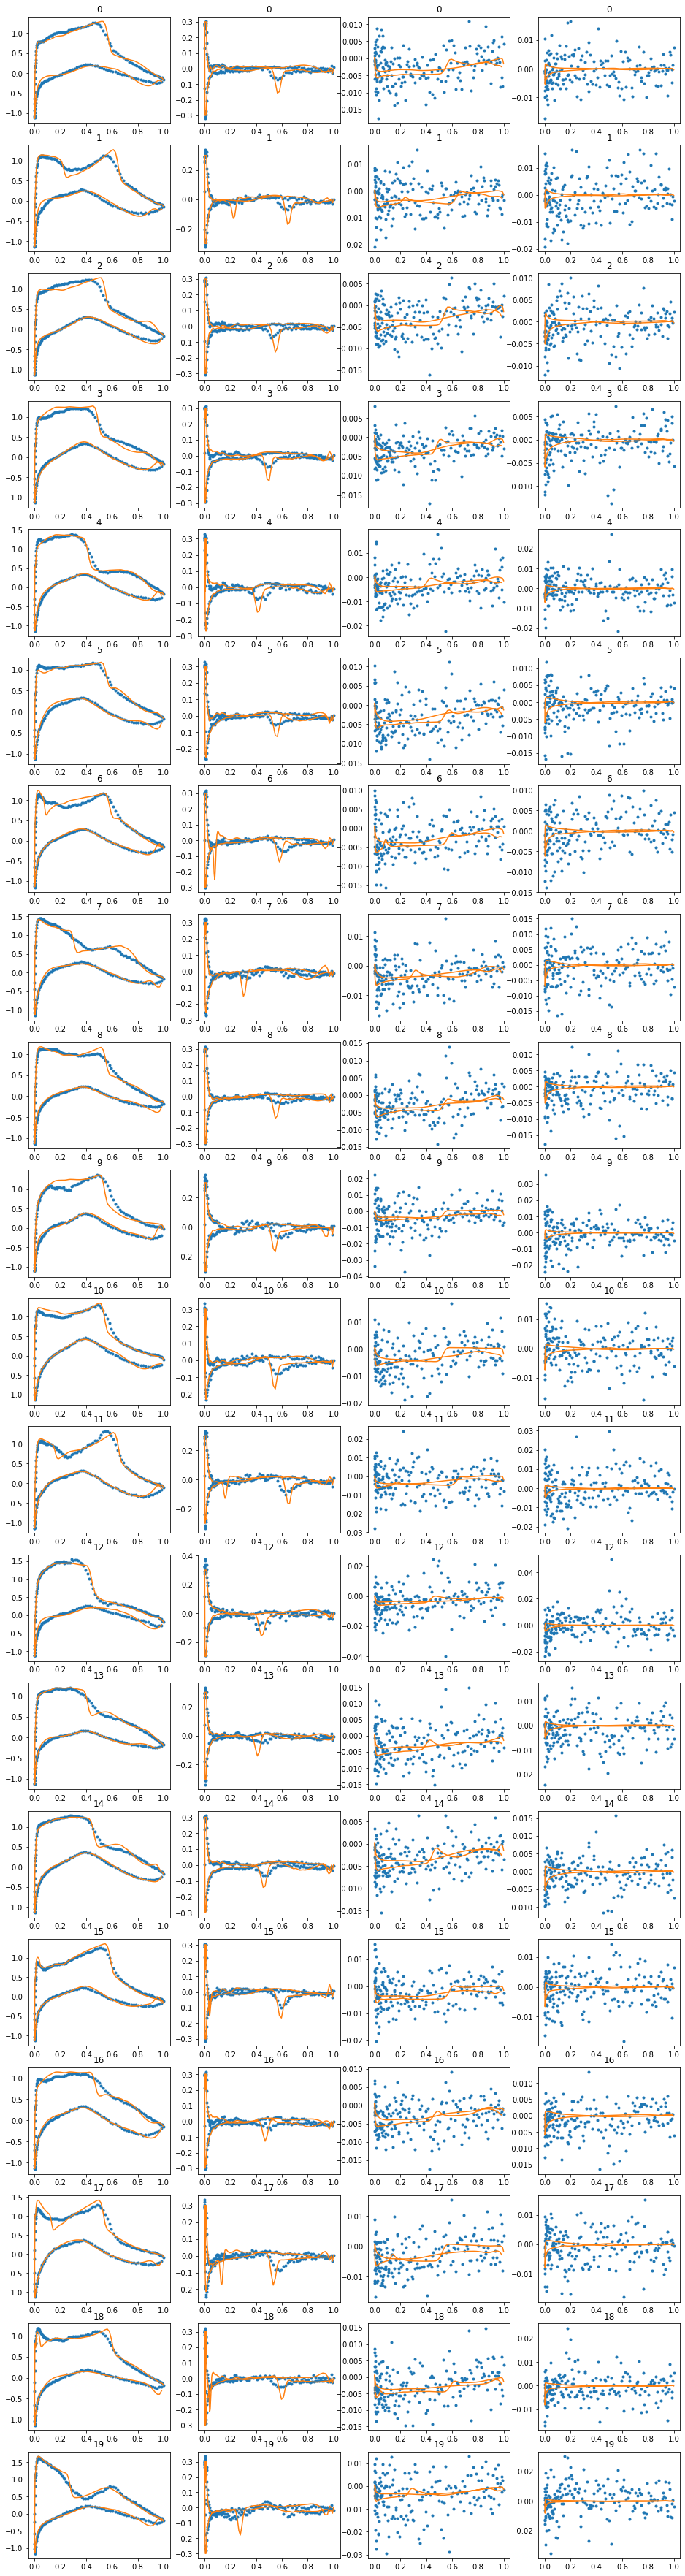

In [110]:
dataset_test = torch.utils.data.TensorDataset(x_test, y_test)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=x_test.shape[0], shuffle=True, pin_memory=True)

net.eval()

for inputs, target in loader_test:
    print(criterion(net(inputs.to("cuda")), target.to("cuda")).detach())
    outputs = net.wo_rand(inputs.to("cuda"))
    #h0 = net.init_hidden()
    #outputs, _ = net(inputs, h0)
    loss = criterion(outputs, target.to("cuda"))
    print(loss.detach())
    break

fig, axes = plt.subplots(20, 4, figsize=(16,64))

for k, ax in enumerate(axes.flat):
    i = int(k / 4)
    j = k % 4
    #i = k
    #j = 0
    ax.plot(inputs[i,0,:].cpu(), -outputs[i, j, :].cpu().detach(), ".")
    ax.plot(inputs[i,0,:].cpu(), -target[i, j, :].cpu())
    ax.set_title(f"{i}")

In [ ]:
#c_D = torch.from_numpy(df_result["c_D"].values)[a]
#_x_train, _x_test, _y_train, _y_test, c_D_train, c_D_test = train_test_split(X, Y[:,:,:], c_D, test_size=0.2)

In [111]:
tm2 = nn.Sequential(
    nn.Linear(64,128),
    nn.PReLU(),
    nn.Linear(128,256),
    nn.PReLU(),
    nn.Linear(256,128),
    nn.PReLU(),
    nn.Linear(128,1),
    ).to("cuda")


In [112]:
#tm2(net.encoder(x_train[:1]))

In [113]:
c_D_train.float().dtype

torch.float32

In [114]:
dataset2 = torch.utils.data.TensorDataset(x_train, c_D_train.float())
loader2 = torch.utils.data.DataLoader(dataset2, batch_size=x_train.shape[0], shuffle=True, pin_memory=True)

In [119]:
#criterion2 = nn.MSELoss()
criterion2 = nn.L1Loss()
#optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.09)
optimizer2 = optim.Adagrad(tm2.parameters(),)
#optimizer = optim.Adam(net.parameters(),)
scheduler2 = optim.lr_scheduler.StepLR(optimizer2, step_size=1000, gamma=0.95)

In [120]:
tm2.train()

for epoch in range(200_000):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(loader2, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, target = data

        # zero the parameter gradients
        optimizer2.zero_grad()

        # forward + backward + optimize
        z = net.encoder(inputs.to("cuda"))
        r = torch.randn_like(z)
        #print(z.detach())
        outputs = tm2(z.detach() + r)
        
        #h0 = net.init_hidden()
        #outputs, h = net(inputs, h0)
        #print(outputs.detach())
        #print(target.detach())
        
        loss = criterion2(outputs, target.view(-1, 1,1).to("cuda").detach())
        loss.backward()
        optimizer2.step()

        # print statistics
        running_loss += loss.item()
        if epoch % 100 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.9f' %
                  (epoch + 1, i + 1, np.power(running_loss/100,1)))
            running_loss = 0.0
            print(scheduler2.get_last_lr())
    scheduler2.step()
    
    #print('[%d, %5d] loss: %f' % (epoch + 1, i + 1, running_loss / i))
print('Finished Training')

[1,     1] loss: 0.000032087
[0.01]
[101,     1] loss: 0.000394085
[0.01]
[201,     1] loss: 0.000148604
[0.01]
[301,     1] loss: 0.000094406
[0.01]
[401,     1] loss: 0.000076923
[0.01]
[501,     1] loss: 0.000060092
[0.01]
[601,     1] loss: 0.000056440
[0.01]
[701,     1] loss: 0.000052037
[0.01]
[801,     1] loss: 0.000048608
[0.01]
[901,     1] loss: 0.000045337
[0.01]
[1001,     1] loss: 0.000042393
[0.0095]
[1101,     1] loss: 0.000037683
[0.0095]
[1201,     1] loss: 0.000038417
[0.0095]
[1301,     1] loss: 0.000036811
[0.0095]
[1401,     1] loss: 0.000033089
[0.0095]
[1501,     1] loss: 0.000031640
[0.0095]
[1601,     1] loss: 0.000032280
[0.0095]
[1701,     1] loss: 0.000031012
[0.0095]
[1801,     1] loss: 0.000029214
[0.0095]
[1901,     1] loss: 0.000029146
[0.0095]
[2001,     1] loss: 0.000028288
[0.009025]
[2101,     1] loss: 0.000026047
[0.009025]
[2201,     1] loss: 0.000025648
[0.009025]
[2301,     1] loss: 0.000025842
[0.009025]
[2401,     1] loss: 0.000024541
[0.00902

[15901,     1] loss: 0.000015561
[0.00463291230159753]
[16001,     1] loss: 0.000014952
[0.0044012666865176535]
[16101,     1] loss: 0.000015218
[0.0044012666865176535]
[16201,     1] loss: 0.000015223
[0.0044012666865176535]
[16301,     1] loss: 0.000014881
[0.0044012666865176535]
[16401,     1] loss: 0.000015652
[0.0044012666865176535]
[16501,     1] loss: 0.000015415
[0.0044012666865176535]
[16601,     1] loss: 0.000014889
[0.0044012666865176535]
[16701,     1] loss: 0.000015342
[0.0044012666865176535]
[16801,     1] loss: 0.000015362
[0.0044012666865176535]
[16901,     1] loss: 0.000014942
[0.0044012666865176535]
[17001,     1] loss: 0.000015512
[0.004181203352191771]
[17101,     1] loss: 0.000015723
[0.004181203352191771]
[17201,     1] loss: 0.000014768
[0.004181203352191771]
[17301,     1] loss: 0.000015407
[0.004181203352191771]
[17401,     1] loss: 0.000015172
[0.004181203352191771]
[17501,     1] loss: 0.000016044
[0.004181203352191771]
[17601,     1] loss: 0.000015235
[0.004

[30401,     1] loss: 0.000014380
[0.0021463876394293723]
[30501,     1] loss: 0.000014359
[0.0021463876394293723]
[30601,     1] loss: 0.000014252
[0.0021463876394293723]
[30701,     1] loss: 0.000014850
[0.0021463876394293723]
[30801,     1] loss: 0.000014391
[0.0021463876394293723]
[30901,     1] loss: 0.000015009
[0.0021463876394293723]
[31001,     1] loss: 0.000014525
[0.0020390682574579037]
[31101,     1] loss: 0.000014895
[0.0020390682574579037]
[31201,     1] loss: 0.000014219
[0.0020390682574579037]
[31301,     1] loss: 0.000014955
[0.0020390682574579037]
[31401,     1] loss: 0.000014707
[0.0020390682574579037]
[31501,     1] loss: 0.000014409
[0.0020390682574579037]
[31601,     1] loss: 0.000014367
[0.0020390682574579037]
[31701,     1] loss: 0.000014796
[0.0020390682574579037]
[31801,     1] loss: 0.000014966
[0.0020390682574579037]
[31901,     1] loss: 0.000014567
[0.0020390682574579037]
[32001,     1] loss: 0.000015001
[0.0019371148445850085]
[32101,     1] loss: 0.00001412

[44801,     1] loss: 0.000014315
[0.0010467395472325495]
[44901,     1] loss: 0.000014566
[0.0010467395472325495]
[45001,     1] loss: 0.000013503
[0.000994402569870922]
[45101,     1] loss: 0.000013987
[0.000994402569870922]
[45201,     1] loss: 0.000014778
[0.000994402569870922]
[45301,     1] loss: 0.000014439
[0.000994402569870922]
[45401,     1] loss: 0.000014765
[0.000994402569870922]
[45501,     1] loss: 0.000013953
[0.000994402569870922]
[45601,     1] loss: 0.000014274
[0.000994402569870922]
[45701,     1] loss: 0.000014621
[0.000994402569870922]
[45801,     1] loss: 0.000014456
[0.000994402569870922]
[45901,     1] loss: 0.000014786
[0.000994402569870922]
[46001,     1] loss: 0.000014139
[0.0009446824413773759]
[46101,     1] loss: 0.000014527
[0.0009446824413773759]
[46201,     1] loss: 0.000013915
[0.0009446824413773759]
[46301,     1] loss: 0.000014781
[0.0009446824413773759]
[46401,     1] loss: 0.000014929
[0.0009446824413773759]
[46501,     1] loss: 0.000014211
[0.00094

[59301,     1] loss: 0.000014113
[0.0004849452524942309]
[59401,     1] loss: 0.000014264
[0.0004849452524942309]
[59501,     1] loss: 0.000014268
[0.0004849452524942309]
[59601,     1] loss: 0.000013948
[0.0004849452524942309]
[59701,     1] loss: 0.000013809
[0.0004849452524942309]
[59801,     1] loss: 0.000014219
[0.0004849452524942309]
[59901,     1] loss: 0.000014497
[0.0004849452524942309]
[60001,     1] loss: 0.000014345
[0.00046069798986951934]
[60101,     1] loss: 0.000014516
[0.00046069798986951934]
[60201,     1] loss: 0.000013798
[0.00046069798986951934]
[60301,     1] loss: 0.000014570
[0.00046069798986951934]
[60401,     1] loss: 0.000014965
[0.00046069798986951934]
[60501,     1] loss: 0.000014163
[0.00046069798986951934]
[60601,     1] loss: 0.000014397
[0.00046069798986951934]
[60701,     1] loss: 0.000013999
[0.00046069798986951934]
[60801,     1] loss: 0.000013439
[0.00046069798986951934]
[60901,     1] loss: 0.000014085
[0.00046069798986951934]
[61001,     1] loss: 

[73601,     1] loss: 0.000014843
[0.00023649566588229923]
[73701,     1] loss: 0.000014095
[0.00023649566588229923]
[73801,     1] loss: 0.000014255
[0.00023649566588229923]
[73901,     1] loss: 0.000014556
[0.00023649566588229923]
[74001,     1] loss: 0.000014336
[0.00022467088258818426]
[74101,     1] loss: 0.000014433
[0.00022467088258818426]
[74201,     1] loss: 0.000014192
[0.00022467088258818426]
[74301,     1] loss: 0.000014348
[0.00022467088258818426]
[74401,     1] loss: 0.000014532
[0.00022467088258818426]
[74501,     1] loss: 0.000013370
[0.00022467088258818426]
[74601,     1] loss: 0.000013750
[0.00022467088258818426]
[74701,     1] loss: 0.000014146
[0.00022467088258818426]
[74801,     1] loss: 0.000014505
[0.00022467088258818426]
[74901,     1] loss: 0.000014576
[0.00022467088258818426]
[75001,     1] loss: 0.000014443
[0.00021343733845877503]
[75101,     1] loss: 0.000013799
[0.00021343733845877503]
[75201,     1] loss: 0.000014349
[0.00021343733845877503]
[75301,     1]

[87801,     1] loss: 0.000013934
[0.00011533301892006353]
[87901,     1] loss: 0.000013978
[0.00011533301892006353]
[88001,     1] loss: 0.000014506
[0.00010956636797406035]
[88101,     1] loss: 0.000013952
[0.00010956636797406035]
[88201,     1] loss: 0.000014218
[0.00010956636797406035]
[88301,     1] loss: 0.000013959
[0.00010956636797406035]
[88401,     1] loss: 0.000014387
[0.00010956636797406035]
[88501,     1] loss: 0.000013965
[0.00010956636797406035]
[88601,     1] loss: 0.000015036
[0.00010956636797406035]
[88701,     1] loss: 0.000014560
[0.00010956636797406035]
[88801,     1] loss: 0.000014154
[0.00010956636797406035]
[88901,     1] loss: 0.000014652
[0.00010956636797406035]
[89001,     1] loss: 0.000014039
[0.00010408804957535733]
[89101,     1] loss: 0.000013752
[0.00010408804957535733]
[89201,     1] loss: 0.000014141
[0.00010408804957535733]
[89301,     1] loss: 0.000013682
[0.00010408804957535733]
[89401,     1] loss: 0.000013461
[0.00010408804957535733]
[89501,     1]

[102101,     1] loss: 0.000014390
[5.3432776213514294e-05]
[102201,     1] loss: 0.000013647
[5.3432776213514294e-05]
[102301,     1] loss: 0.000014772
[5.3432776213514294e-05]
[102401,     1] loss: 0.000014377
[5.3432776213514294e-05]
[102501,     1] loss: 0.000014620
[5.3432776213514294e-05]
[102601,     1] loss: 0.000014205
[5.3432776213514294e-05]
[102701,     1] loss: 0.000013607
[5.3432776213514294e-05]
[102801,     1] loss: 0.000014610
[5.3432776213514294e-05]
[102901,     1] loss: 0.000014405
[5.3432776213514294e-05]
[103001,     1] loss: 0.000014030
[5.0761137402838575e-05]
[103101,     1] loss: 0.000014910
[5.0761137402838575e-05]
[103201,     1] loss: 0.000014255
[5.0761137402838575e-05]
[103301,     1] loss: 0.000013862
[5.0761137402838575e-05]
[103401,     1] loss: 0.000013593
[5.0761137402838575e-05]
[103501,     1] loss: 0.000014169
[5.0761137402838575e-05]
[103601,     1] loss: 0.000014003
[5.0761137402838575e-05]
[103701,     1] loss: 0.000013693
[5.0761137402838575e-0

[116301,     1] loss: 0.000013866
[2.6057828024010345e-05]
[116401,     1] loss: 0.000014291
[2.6057828024010345e-05]
[116501,     1] loss: 0.000014537
[2.6057828024010345e-05]
[116601,     1] loss: 0.000013622
[2.6057828024010345e-05]
[116701,     1] loss: 0.000014145
[2.6057828024010345e-05]
[116801,     1] loss: 0.000014065
[2.6057828024010345e-05]
[116901,     1] loss: 0.000013663
[2.6057828024010345e-05]
[117001,     1] loss: 0.000014797
[2.4754936622809825e-05]
[117101,     1] loss: 0.000014979
[2.4754936622809825e-05]
[117201,     1] loss: 0.000014046
[2.4754936622809825e-05]
[117301,     1] loss: 0.000014272
[2.4754936622809825e-05]
[117401,     1] loss: 0.000013674
[2.4754936622809825e-05]
[117501,     1] loss: 0.000014140
[2.4754936622809825e-05]
[117601,     1] loss: 0.000014986
[2.4754936622809825e-05]
[117701,     1] loss: 0.000014512
[2.4754936622809825e-05]
[117801,     1] loss: 0.000014666
[2.4754936622809825e-05]
[117901,     1] loss: 0.000014069
[2.4754936622809825e-0

[130301,     1] loss: 0.000014023
[1.2707750737405305e-05]
[130401,     1] loss: 0.000014431
[1.2707750737405305e-05]
[130501,     1] loss: 0.000014366
[1.2707750737405305e-05]
[130601,     1] loss: 0.000013443
[1.2707750737405305e-05]
[130701,     1] loss: 0.000014228
[1.2707750737405305e-05]
[130801,     1] loss: 0.000014158
[1.2707750737405305e-05]
[130901,     1] loss: 0.000014229
[1.2707750737405305e-05]
[131001,     1] loss: 0.000013881
[1.2072363200535039e-05]
[131101,     1] loss: 0.000014417
[1.2072363200535039e-05]
[131201,     1] loss: 0.000013649
[1.2072363200535039e-05]
[131301,     1] loss: 0.000014285
[1.2072363200535039e-05]
[131401,     1] loss: 0.000014038
[1.2072363200535039e-05]
[131501,     1] loss: 0.000013894
[1.2072363200535039e-05]
[131601,     1] loss: 0.000014115
[1.2072363200535039e-05]
[131701,     1] loss: 0.000013841
[1.2072363200535039e-05]
[131801,     1] loss: 0.000014214
[1.2072363200535039e-05]
[131901,     1] loss: 0.000013904
[1.2072363200535039e-0

[144401,     1] loss: 0.000013986
[6.197252075469486e-06]
[144501,     1] loss: 0.000014956
[6.197252075469486e-06]
[144601,     1] loss: 0.000014221
[6.197252075469486e-06]
[144701,     1] loss: 0.000013677
[6.197252075469486e-06]
[144801,     1] loss: 0.000014281
[6.197252075469486e-06]
[144901,     1] loss: 0.000014477
[6.197252075469486e-06]
[145001,     1] loss: 0.000014061
[5.887389471696011e-06]
[145101,     1] loss: 0.000013320
[5.887389471696011e-06]
[145201,     1] loss: 0.000014024
[5.887389471696011e-06]
[145301,     1] loss: 0.000014250
[5.887389471696011e-06]
[145401,     1] loss: 0.000014455
[5.887389471696011e-06]
[145501,     1] loss: 0.000014348
[5.887389471696011e-06]
[145601,     1] loss: 0.000014180
[5.887389471696011e-06]
[145701,     1] loss: 0.000014354
[5.887389471696011e-06]
[145801,     1] loss: 0.000014353
[5.887389471696011e-06]
[145901,     1] loss: 0.000014094
[5.887389471696011e-06]
[146001,     1] loss: 0.000014718
[5.593019998111211e-06]
[146101,     1

[158601,     1] loss: 0.000013667
[3.022244776478254e-06]
[158701,     1] loss: 0.000014174
[3.022244776478254e-06]
[158801,     1] loss: 0.000014375
[3.022244776478254e-06]
[158901,     1] loss: 0.000014447
[3.022244776478254e-06]
[159001,     1] loss: 0.000014140
[2.871132537654341e-06]
[159101,     1] loss: 0.000013669
[2.871132537654341e-06]
[159201,     1] loss: 0.000013484
[2.871132537654341e-06]
[159301,     1] loss: 0.000014627
[2.871132537654341e-06]
[159401,     1] loss: 0.000014337
[2.871132537654341e-06]
[159501,     1] loss: 0.000014489
[2.871132537654341e-06]
[159601,     1] loss: 0.000014168
[2.871132537654341e-06]
[159701,     1] loss: 0.000014489
[2.871132537654341e-06]
[159801,     1] loss: 0.000013802
[2.871132537654341e-06]
[159901,     1] loss: 0.000014095
[2.871132537654341e-06]
[160001,     1] loss: 0.000013799
[2.7275759107716237e-06]
[160101,     1] loss: 0.000014063
[2.7275759107716237e-06]
[160201,     1] loss: 0.000013680
[2.7275759107716237e-06]
[160301,   

[172601,     1] loss: 0.000013530
[1.473873158251051e-06]
[172701,     1] loss: 0.000013999
[1.473873158251051e-06]
[172801,     1] loss: 0.000014506
[1.473873158251051e-06]
[172901,     1] loss: 0.000013791
[1.473873158251051e-06]
[173001,     1] loss: 0.000014248
[1.4001795003384984e-06]
[173101,     1] loss: 0.000015278
[1.4001795003384984e-06]
[173201,     1] loss: 0.000014518
[1.4001795003384984e-06]
[173301,     1] loss: 0.000014360
[1.4001795003384984e-06]
[173401,     1] loss: 0.000014781
[1.4001795003384984e-06]
[173501,     1] loss: 0.000014548
[1.4001795003384984e-06]
[173601,     1] loss: 0.000013415
[1.4001795003384984e-06]
[173701,     1] loss: 0.000014767
[1.4001795003384984e-06]
[173801,     1] loss: 0.000014575
[1.4001795003384984e-06]
[173901,     1] loss: 0.000013873
[1.4001795003384984e-06]
[174001,     1] loss: 0.000013856
[1.3301705253215734e-06]
[174101,     1] loss: 0.000014508
[1.3301705253215734e-06]
[174201,     1] loss: 0.000013898
[1.3301705253215734e-06]
[

[186701,     1] loss: 0.000014423
[7.187710616690208e-07]
[186801,     1] loss: 0.000014429
[7.187710616690208e-07]
[186901,     1] loss: 0.000014459
[7.187710616690208e-07]
[187001,     1] loss: 0.000014162
[6.828325085855697e-07]
[187101,     1] loss: 0.000014062
[6.828325085855697e-07]
[187201,     1] loss: 0.000013718
[6.828325085855697e-07]
[187301,     1] loss: 0.000013731
[6.828325085855697e-07]
[187401,     1] loss: 0.000014151
[6.828325085855697e-07]
[187501,     1] loss: 0.000013968
[6.828325085855697e-07]
[187601,     1] loss: 0.000014437
[6.828325085855697e-07]
[187701,     1] loss: 0.000014652
[6.828325085855697e-07]
[187801,     1] loss: 0.000014291
[6.828325085855697e-07]
[187901,     1] loss: 0.000014328
[6.828325085855697e-07]
[188001,     1] loss: 0.000014725
[6.486908831562911e-07]
[188101,     1] loss: 0.000014121
[6.486908831562911e-07]
[188201,     1] loss: 0.000014845
[6.486908831562911e-07]
[188301,     1] loss: 0.000014022
[6.486908831562911e-07]
[188401,     1

In [ ]:
tm2.state_dict()

In [ ]:
tm2.eval().cpu()

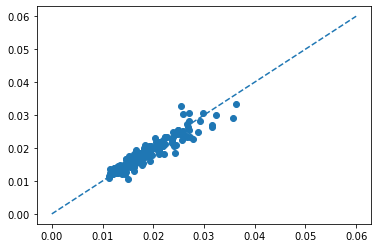

In [121]:
output_test = tm2(net.encoder(x_test.to("cuda"))).cpu()

plt.scatter(c_D_test, output_test.detach())
plt.plot([0.0, 0.06], [0.0, 0.06],'--')

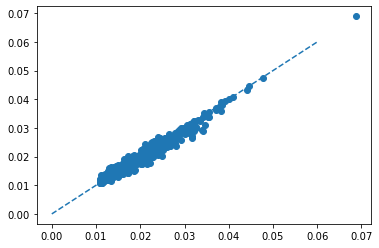

In [122]:
output_train = tm2(net.encoder(x_train.to("cuda"))).cpu()

plt.scatter(c_D_train, output_train.detach())
plt.plot([0.0, 0.06], [0.0, 0.06],'--')

In [125]:
torch.save(tm2, "net6_tm2.pt")

In [89]:
c_D_train, output_test.detach(), 

(tensor([0.0291, 0.0113, 0.0149, 0.0137, 0.0211, 0.0120, 0.0211, 0.0203, 0.0326,
         0.0214, 0.0124, 0.0161, 0.0155, 0.0275, 0.0203, 0.0161, 0.0188, 0.0222,
         0.0118, 0.0200, 0.0211, 0.0140, 0.0172, 0.0331, 0.0151, 0.0283, 0.0177,
         0.0175, 0.0182, 0.0190, 0.0138, 0.0137, 0.0144, 0.0148, 0.0242, 0.0144,
         0.0229, 0.0221, 0.0231, 0.0159, 0.0124, 0.0209, 0.0189, 0.0144, 0.0115,
         0.0161, 0.0227, 0.0243, 0.0267, 0.0192, 0.0227, 0.0381, 0.0148, 0.0173,
         0.0112, 0.0131, 0.0128, 0.0152, 0.0309, 0.0284, 0.0199, 0.0158, 0.0186,
         0.0172, 0.0189, 0.0118, 0.0216, 0.0132, 0.0218, 0.0183, 0.0176, 0.0158,
         0.0134, 0.0184, 0.0165, 0.0237, 0.0113, 0.0174, 0.0255, 0.0117, 0.0189,
         0.0184, 0.0197, 0.0120, 0.0137, 0.0166, 0.0278, 0.0190, 0.0307, 0.0131,
         0.0156, 0.0109, 0.0157, 0.0199, 0.0244, 0.0183, 0.0151, 0.0134, 0.0165,
         0.0163, 0.0137, 0.0117, 0.0227, 0.0118, 0.0198, 0.0158, 0.0168, 0.0224,
         0.0211, 0.0155, 0.0

In [90]:
for i, _ in enumerate(c_D_train):
    print(i, c_D_train[i].numpy(), output_train[i].detach().numpy())

0 0.02906 [[0.02724498]]
1 0.011309 [[0.01053675]]
2 0.014918 [[0.01278947]]
3 0.013726 [[0.01337412]]
4 0.02106 [[0.02297519]]
5 0.011978 [[0.01284391]]
6 0.021086 [[0.0191406]]
7 0.020307 [[0.02272962]]
8 0.032614 [[0.03015276]]
9 0.021401 [[0.02272616]]
10 0.012421 [[0.01453209]]
11 0.016118 [[0.01571559]]
12 0.015463 [[0.01585099]]
13 0.027512 [[0.02509888]]
14 0.020274 [[0.02106326]]
15 0.016138 [[0.0162721]]
16 0.018842 [[0.01866718]]
17 0.022181 [[0.01936099]]
18 0.011796 [[0.01203938]]
19 0.020049 [[0.02011748]]
20 0.021052 [[0.02082554]]
21 0.013968 [[0.01407739]]
22 0.017217 [[0.01582369]]
23 0.033103 [[0.03274007]]
24 0.015136 [[0.01489]]
25 0.028288 [[0.03033756]]
26 0.017702 [[0.01779186]]
27 0.017521 [[0.01615418]]
28 0.018242 [[0.01872702]]
29 0.019009 [[0.01837542]]
30 0.013785 [[0.01246636]]
31 0.013696 [[0.01355081]]
32 0.014402 [[0.01367452]]
33 0.014784 [[0.01502986]]
34 0.024216 [[0.02532665]]
35 0.014425 [[0.0143315]]
36 0.022881 [[0.02118076]]
37 0.022058 [[0.022

465 0.030232 [[0.02905119]]
466 0.014619 [[0.01574516]]
467 0.017647 [[0.01758924]]
468 0.01727 [[0.01749508]]
469 0.028862 [[0.02829118]]
470 0.019984 [[0.01699866]]
471 0.017863 [[0.01868657]]
472 0.015282 [[0.01506058]]
473 0.014161 [[0.01372741]]
474 0.021941 [[0.02653556]]
475 0.012729 [[0.01232762]]
476 0.017855 [[0.01737437]]
477 0.014045 [[0.01607376]]
478 0.017919 [[0.01869351]]
479 0.013828 [[0.01502902]]
480 0.019688 [[0.01605031]]
481 0.011092 [[0.01251743]]
482 0.01503 [[0.0168543]]
483 0.019375 [[0.0172583]]
484 0.013493 [[0.01297577]]
485 0.029587 [[0.02965857]]
486 0.014842 [[0.01500627]]
487 0.015344 [[0.01497506]]
488 0.015371 [[0.01572116]]
489 0.012951 [[0.01369452]]
490 0.015154 [[0.01201086]]
491 0.026771 [[0.02415495]]
492 0.020853 [[0.02044592]]
493 0.02298 [[0.02346415]]
494 0.023816 [[0.0235967]]
495 0.031039 [[0.02953941]]
496 0.022351 [[0.02238302]]
497 0.022121 [[0.02053302]]
498 0.015806 [[0.01618937]]
499 0.011662 [[0.01412988]]
500 0.02861 [[0.02655561]]

In [ ]:
tm2.eval()
for i, _ in enumerate(x_test):
    output = tm2(net.encoder(x_test[i:i+1,:,:].to("cuda")).cpu())
    print(output)
    print(c_D_test[i])

In [ ]:
Z = net.encoder(X.to("cuda"))

In [ ]:
Z.shape

In [ ]:
emb = Z.detach().cpu().view(400,64)

In [ ]:
emb

In [ ]:
c_D = torch.from_numpy(df_result["c_D"].values[a])

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(metric="cosine")

In [ ]:
XX = tsne.fit_transform(emb)

In [ ]:
plt.scatter(XX[:,0], XX[:,1], c=np.clip(c_D, a_max=0.03, a_min=0))

In [ ]:
import bokeh

In [123]:
s = """15 236  72  51 246   8 231 202  75  53 238  78
  40 251  81  51 232  80  48 246  74  58 167  66
  54 249 252  58 246  72  61 240  74  46 167  80
  47 236 252  14 232  73  41 240  80 231 234  68
  40 243  72  44 245  67  44 181 252  23 243  65
  40 250  65 231 250  65  53 235 252  64 246  81
  57 167  79  54 243  81  59 240  75  53 167  61
  53 235 252  10 221 252  59 246 252  48 234  61
  53 234  75  43 236  28  46 232  73  41 240  80
  57 236  79  44 232  78  42 239  10  42 246  73
 231 248  81  54 251  69  53 238 252  57 236  66
  44 249  65  53 234  65   1 167  14  44 192  17
 249 234  21  43 235  20"""

In [124]:
[chr(int(i)) for i in s.split()]

['\x0f',
 'ì',
 'H',
 '3',
 'ö',
 '\x08',
 'ç',
 'Ê',
 'K',
 '5',
 'î',
 'N',
 '(',
 'û',
 'Q',
 '3',
 'è',
 'P',
 '0',
 'ö',
 'J',
 ':',
 '§',
 'B',
 '6',
 'ù',
 'ü',
 ':',
 'ö',
 'H',
 '=',
 'ð',
 'J',
 '.',
 '§',
 'P',
 '/',
 'ì',
 'ü',
 '\x0e',
 'è',
 'I',
 ')',
 'ð',
 'P',
 'ç',
 'ê',
 'D',
 '(',
 'ó',
 'H',
 ',',
 'õ',
 'C',
 ',',
 'µ',
 'ü',
 '\x17',
 'ó',
 'A',
 '(',
 'ú',
 'A',
 'ç',
 'ú',
 'A',
 '5',
 'ë',
 'ü',
 '@',
 'ö',
 'Q',
 '9',
 '§',
 'O',
 '6',
 'ó',
 'Q',
 ';',
 'ð',
 'K',
 '5',
 '§',
 '=',
 '5',
 'ë',
 'ü',
 '\n',
 'Ý',
 'ü',
 ';',
 'ö',
 'ü',
 '0',
 'ê',
 '=',
 '5',
 'ê',
 'K',
 '+',
 'ì',
 '\x1c',
 '.',
 'è',
 'I',
 ')',
 'ð',
 'P',
 '9',
 'ì',
 'O',
 ',',
 'è',
 'N',
 '*',
 'ï',
 '\n',
 '*',
 'ö',
 'I',
 'ç',
 'ø',
 'Q',
 '6',
 'û',
 'E',
 '5',
 'î',
 'ü',
 '9',
 'ì',
 'B',
 ',',
 'ù',
 'A',
 '5',
 'ê',
 'A',
 '\x01',
 '§',
 '\x0e',
 ',',
 'À',
 '\x11',
 'ù',
 'ê',
 '\x15',
 '+',
 'ë',
 '\x14']